In [261]:
import numpy as np
import pandas as pd
from sklearn import svm, model_selection, preprocessing, pipeline, impute, feature_selection
from sklearn.experimental import enable_iterative_imputer
from itertools import chain, combinations, product
import scipy
import math
import time

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=UserWarning)


import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

%matplotlib inline
from pyAgrum.lib.bn2roc import showROC
from pyAgrum.lib.bn2roc import showPR
from pyAgrum.lib.bn2roc import showROC_PR

import networkx as nx
#import graphviz

import random

import researchpy as rp
import scipy.stats as stats

from decimal import * 

In [262]:
# Constants
EPSILON = 0.001

In [263]:
data = pd.read_csv("insurance.csv")
#data = data.convert_dtypes()
data

GoodStudent         Age    SocioEcon RiskAversion VehicleYear  \
0            False       Adult        Prole  Adventurous       Older   
1            False      Senior        Prole     Cautious     Current   
2            False      Senior  UpperMiddle   Psychopath     Current   
3            False  Adolescent       Middle       Normal       Older   
4            False  Adolescent        Prole       Normal       Older   
...            ...         ...          ...          ...         ...   
19995        False       Adult        Prole  Adventurous       Older   
19996        False       Adult       Middle       Normal       Older   
19997        False      Senior  UpperMiddle       Normal     Current   
19998        False       Adult       Middle       Normal       Older   
19999        False       Adult       Middle       Normal       Older   

      ThisCarDam RuggedAuto  Accident    MakeModel DrivQuality  ... HomeBase  \
0       Moderate   EggShell      Mild      Economy        Poor  ...     City   
1           None   Football      None      Economy      Normal  ...     City   
2           None   Football      None  FamilySedan   Excellent  ...     City   
3           None   EggShell      None      Economy      Normal  ...   Suburb   
4       Moderate   Football  Moderate      Economy        Poor  ...     City   
...          ...        ...       ...          ...         ...  ...      ...   
19995       Mild   Football      Mild      Economy        Poor  ...     City   
19996       None       Tank      None  FamilySedan      Normal  ...   Suburb   
19997       None   Football      None       Luxury   Excellent  ...   Secure   
19998       None   Football      None  FamilySedan   Excellent  ...   Suburb   
19999       None       Tank      None  FamilySedan   Excellent  ...   Secure   

       AntiTheft  PropCost  OtherCarCost OtherCar   MedCost Cushioning Airbag  \
0          False   TenThou      Thousand     True  Thousand       Poor  False   
1           True  Thousand      Thousand     True  Thousand       Good   True   
2          False  Thousand      Thousand    False  Thousand       Good   True   
3          False  Thousand      Thousand     True  Thousand       Fair  False   
4          False   TenThou      Thousand    False  Thousand       Fair  False   
...          ...       ...           ...      ...       ...        ...    ...   
19995      False  Thousand      Thousand     True  Thousand       Fair  False   
19996      False  Thousand      Thousand     True  Thousand       Good  False   
19997       True   TenThou      Thousand    False  Thousand  Excellent   True   
19998      False  Thousand      Thousand     True  Thousand       Good   True   
19999      False  Thousand      Thousand     True  Thousand  Excellent   True   

        ILiCost DrivHist  
0      Thousand     Many  
1      Thousand     Zero  
2      Thousand      One  
3      Thousand     Zero  
4      Thousand     Many  
...         ...      ...  
19995  Thousand     Many  
19996  Thousand     Zero  
19997  Thousand     Zero  
19998  Thousand     Zero  
19999  Thousand     Zero  

[20000 rows x 27 columns]

In [264]:
#X = data[data.columns.drop(["RiskAversion", "Accident"])]
#y = data[["RiskAversion", "Accident"]]

target = ["Accident"]

X = data[data.columns.drop(target)]
y = data[target]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

In [265]:
app = X_train.copy()
app[target] = y_train

learner=gum.BNLearner(app)

bn = learner.learnBN()

bn=learner.useGreedyHillClimbing().useScoreK2().learnBN()

bn = gum.loadBN("insurance.bif")



In [266]:
#gum.generateSample(bn, 15000, "file2.csv",True, True, False)

#data = pd.read_csv("file2.csv")

gen = gum.BNDatabaseGenerator(bn)

gen.drawSamples(15000)

data = gen.to_pandas()

print(gen.log2likelihood())
print(np.exp(gen.log2likelihood()))




X = data[data.columns.drop(target)]
y = data[target]

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

app = X_train.copy()
app[target] = y_train

-283510.3005090156
0.0


In [267]:
data

GoodStudent         Age    SocioEcon RiskAversion VehicleYear  \
0           False       Adult  UpperMiddle       Normal     Current   
1           False       Adult       Middle     Cautious       Older   
2           False       Adult       Middle  Adventurous       Older   
3           False       Adult       Middle       Normal     Current   
4           False       Adult       Middle       Normal     Current   
...           ...         ...          ...          ...         ...   
14995       False       Adult        Prole       Normal       Older   
14996       False       Adult  UpperMiddle  Adventurous     Current   
14997       False      Senior        Prole       Normal       Older   
14998       False  Adolescent  UpperMiddle  Adventurous     Current   
14999       False       Adult       Middle       Normal       Older   

      ThisCarDam RuggedAuto Accident    MakeModel DrivQuality  ... HomeBase  \
0           None   Football     None       Luxury   Excellent  ...   Suburb   
1           None   EggShell     None  FamilySedan      Normal  ...   Secure   
2           None       Tank     None  FamilySedan      Normal  ...   Suburb   
3           None   Football     None  FamilySedan      Normal  ...   Suburb   
4         Severe       Tank   Severe  FamilySedan        Poor  ...    Rural   
...          ...        ...      ...          ...         ...  ...      ...   
14995       None   EggShell     None      Economy      Normal  ...     City   
14996       Mild   Football     Mild       Luxury        Poor  ...   Suburb   
14997       None   EggShell     None    SportsCar      Normal  ...    Rural   
14998       Mild   Football     Mild  FamilySedan        Poor  ...   Suburb   
14999     Severe   Football   Severe  FamilySedan        Poor  ...   Suburb   

      AntiTheft     PropCost OtherCarCost OtherCar   MedCost Cushioning  \
0         False     Thousand     Thousand    False  Thousand  Excellent   
1          True      TenThou     Thousand     True  Thousand       Poor   
2         False      TenThou     Thousand     True  Thousand       Good   
3          True     Thousand     Thousand     True  Thousand       Good   
4          True  HundredThou  HundredThou    False  Thousand  Excellent   
...         ...          ...          ...      ...       ...        ...   
14995      True     Thousand     Thousand     True  Thousand       Fair   
14996     False      TenThou     Thousand     True  Thousand  Excellent   
14997     False     Thousand     Thousand    False  Thousand       Good   
14998     False     Thousand     Thousand     True  Thousand  Excellent   
14999     False      TenThou     Thousand     True  Thousand       Good   

      Airbag      ILiCost DrivHist  
0       True     Thousand     Zero  
1      False     Thousand     Zero  
2      False     Thousand     Many  
3       True     Thousand     Zero  
4       True  HundredThou      One  
...      ...          ...      ...  
14995  False     Thousand     Zero  
14996   True     Thousand     Zero  
14997   True     Thousand     Zero  
14998   True     Thousand     Zero  
14999  False     Thousand     Many  

[15000 rows x 27 columns]

In [10]:
gnb.flow.add(gnb.getBN(bn,size="20"))
gnb.flow.display()

In [11]:
# ["DrivingSkill", "RiskAversion"], ["DrivHist"])
acc = 0
domain = sorted(np.unique(y_train.to_numpy()))
for i in X_test.index :
    ie=gum.LazyPropagation(bn)
    ie.addTarget("Accident")
    instance = X_test.loc[i]
    for j in X_test.columns :
        ie.addEvidence(j,str(instance[j]))
    ie.makeInference()
    post = ie.posterior("Accident")
    #print(post)
    #print(y_test.loc[i])
    acc = acc + post[domain.index(y_test.loc[i])]
print(acc / len(X_test.index))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
bn.dag().dSeparation(bn.nodeset(["DrivHist"]),bn.nodeset(["CarValue"]),bn.nodeset(["DrivingSkill", "RiskAversion"]))

In [ ]:
bn.nodeset(["OtherCarCost"])

In [12]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
ie.setEvidence({"RiskAversion" : "Psychopath", "Accident" : "None"})
ie.evidenceProbability()
#print(ie.posterior(bn.idFromName("Accident")))


0.007787674345604354

In [13]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
ie.addJointTarget(set(["Accident", "RiskAversion"]))
#ie.setEvidence({"RiskAversion" : "Psychopath"})
#ie.evidenceProbability()
print(ie.jointPosterior(set(["Accident", "RiskAversion"])))


      ||  Accident                             |
RiskAv||None     |Mild     |Moderate |Severe   |
------||---------|---------|---------|---------|
Psycho|| 0.0078  | 0.0021  | 0.0020  | 0.0030  |
Advent|| 0.1562  | 0.0310  | 0.0290  | 0.0431  |
Normal|| 0.3552  | 0.0399  | 0.0358  | 0.0504  |
Cautio|| 0.1967  | 0.0155  | 0.0136  | 0.0188  |



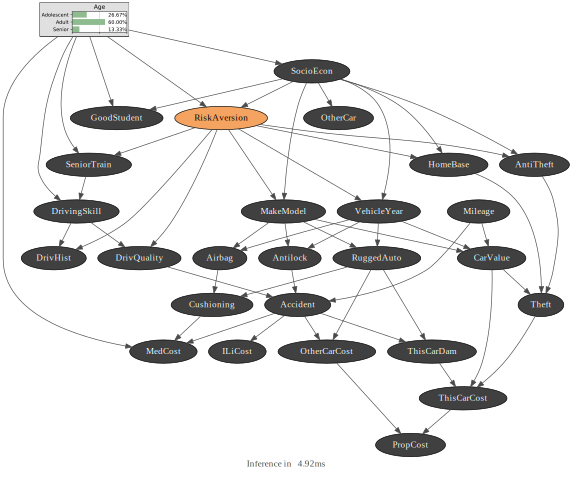

In [14]:
res = gnb.showInference(model = bn, engine = gum.LazyPropagation(bn), evs = {"RiskAversion" : "Psychopath"}, targets = ["Age"], view = "graph")


In [15]:
#bn.cpt(1).variable(1).domain()

bn.variableFromName("Age").labels()

('Adolescent', 'Adult', 'Senior')

In [16]:
ie=gum.LazyPropagation(bn)
#ie.makeInference()
ie.addEvidence("RiskAversion","Cautious")
ie.addJointTarget(set(["Accident", "ILiCost"]))
print(ie.jointPosterior(set(["Accident", "ILiCost"])))


      ||  Accident                             |
ILiCos||None     |Mild     |Moderate |Severe   |
------||---------|---------|---------|---------|
Thousa|| 0.8042  | 0.0633  | 0.0500  | 0.0615  |
TenTho|| 0.0000  | 0.0001  | 0.0028  | 0.0077  |
Hundre|| 0.0000  | 0.0000  | 0.0017  | 0.0046  |
Millio|| 0.0000  | 0.0000  | 0.0011  | 0.0031  |



In [17]:
l = np.unique(y_train.to_numpy())
print(sorted(l))

['Mild', 'Moderate', 'None', 'Severe']


In [18]:
def powerset(iterable,depth = np.inf):
    s = list(iterable)
    tmp = list(chain.from_iterable(combinations(s, r) for r in range(min(len(s),depth)+1)))
    return tmp

In [19]:
def omega(variable, data) :
    return list(data[variable].unique())

In [20]:
omega("Age",X)

['Adult', 'Adolescent', 'Senior']

In [21]:
def reduce_dataset(instance, X,y) :
    print(instance)
    columns = list(X.columns)
    #columns.remove("index")
    for i,value in enumerate(instance) :
        if isinstance(value, str) or not math.isnan(value) :
            print(columns[i], " is evidence!")
            X = X[X[columns[i]] == value]
            X = X.drop(columns[i], axis=1)
        else :
            print(columns[i], " is unobserved")
    y = y[[j for j in y.index if j in X.index]]
    return X,y

In [22]:
def equal_sets(set1,set2) :
    if len(set1) != len(set2) :
        return False
    for i in set1 :
        if i not in set2 :
            return False
    return True

def list_diff(list1, list2) :
    diff = []
    for i in list1 :
        if i not in list2 :
            diff.append(i)
    return diff

def prune_network(bn, ev_vars, hyp_vars, supp_vars = None) :
    #IMPORTANT: Hard copy of the bn
    bn_pr = gum.BayesNet(bn)
    # Find supplementary nodes of a network if not given
    
    if supp_vars is None :
        supp_vars = []
        for i in bn_pr.names() :
            if not i in ev_vars and not i in hyp_vars :
                supp_vars.append(i)
    # Delete from the network the nodes that are conditionally independent from the hypothesis variables (target) given the evidence
    dsep_nodes = []
    for i in supp_vars :
        if bn_pr.isIndependent(i,hyp_vars,ev_vars):
            dsep_nodes.append(i)
    for i in dsep_nodes :
        bn_pr.erase(i)
    return bn_pr, dsep_nodes

def map_query(bn, ev_vars, hyp_vars, alg = "jt") :
    return propagate_evidence(bn, ev_vars, joint_targets = [hyp_vars], alg = alg).jointPosterior(set(hyp_vars))



def propagate_evidence(bn, ev_vars, joint_targets = [], alg = "jt") :
    ie=gum.ShaferShenoyInference(bn)
    if alg == "gs" :
        ie=gum.GibbsSampling(bn)
        ie.setMaxTime(3)
        for i in joint_targets :
            if len(i) > 1 :
                ie=gum.ShaferShenoyInference(bn)
                break
    for i in joint_targets :
        # Ignore if the target is not joint
        ie.addJointTarget(set(i))
    ie.setEvidence(ev_vars)
    ie.makeInference()
    return ie
            
    
def omega(variables, data = None , bn = None) :
    domains = []
    if bn is not None :
        for variable in variables :
            domains.append(sorted(bn.variableFromName(variable).labels()))
    else :
        for variable in variables :
            domains.append(sorted(data[variable].unique()))
    return [p for p in product(*domains)]
    

def prepare_mapi(instances, variables) :
     #Type checking
    if isinstance(instances, pd.core.frame.DataFrame) :
        instances = instances.to_numpy()
    #Array for each instance
    evidence_set = []
    # For each instance:
    for instance in instances :
        # Check which are the evidence variables
        evidence = dict()
        for i,value in enumerate(instance) :
            if isinstance(value, str) or not math.isnan(value) :
                evidence[variables[i]] = value
        evidence_set.append(evidence)
    return evidence_set
    

# True if R is relevant/MAP-dependent
# False if R is irrelevant/MAP-independent
def map_dependence(bn, set_R, ev_vars, hyp_vars, hyp_vars_assign = None, hyp_posterior = None, return_jsd = False) : 
    # Check which are the supplementary (missing) variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)
    # Check if R in unobserved
    #print(supp_vars)
    for R in set_R :
        if R not in supp_vars :
            raise Exception("The variable", R, "is in the set R but is not a supplementary node")
    y = hyp_vars_assign
    posterior = hyp_posterior
    if y is None :    
        # Perform a MAP-query and get the argmax from the posterior. 
        # Check if a posterior for P(H|e) was provided
        if hyp_posterior is None :
            posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
            y = posterior.argmax()[0][0]
        else :
            y = posterior.argmax()[0][0]
    # Obtain domain of R
    omega_R = omega(set_R, bn = bn)
    # For each value assignment r in omega(R)
    jsd = 0
    for value_assignment_r in omega_R :
        # Fill in values
        ev_vars_alt = ev_vars.copy()
        for i,value in enumerate(value_assignment_r) :
            ev_vars_alt[set_R[i]] = value
        #print(instance)
        #print(instance_alt)
        # Inference with evidence and r
        posterior_alt = None
        try :
            posterior_alt = map_query(bn, ev_vars = ev_vars_alt, hyp_vars = hyp_vars)
        except :
            continue
        y_alt = posterior_alt.argmax()[0][0]
        # Check if we need to compute the jsd divergence between P(H|e) and P(H|e,r)
        if return_jsd :
            jsd = max(jsd, JSD(posterior,posterior_alt))
        # Comparar con prediccion de instance
        #print(value_assignment_r)
        #print(y, " == ", y_alt)
        #print(posterior.argmax()[1], "--", posterior_alt.argmax()[1])
        if y != y_alt :
            if return_jsd :
                return True, jsd
            else :
                return True
    if return_jsd:
        return False, jsd
    else :
        return False
    
def map_independence(bn, set_R, ev_vars, hyp_vars, hyp_vars_assign = None, hyp_posterior = None, return_jsd = False) : 
    if return_jsd :
        mapd, jsd = map_dependence(bn, set_R, ev_vars, hyp_vars, hyp_vars_assign = hyp_vars_assign,
                                   hyp_posterior = hyp_posterior, return_jsd = True)
        return (not mapd, jsd)
    else :
        return not map_dependence(bn, set_R, ev_vars, hyp_vars, hyp_vars_assign = hyp_vars_assign,
                                  hyp_posterior = hyp_posterior, return_jsd = False)

In [23]:
#print(bn.dag().dSeparation(bn.nodeset(["DrivHist"]),bn.nodeset(["CarValue"]),bn.nodeset(["DrivingSkill", "RiskAversion"])))
bn_pr,_ = prune_network(bn, ["DrivingSkill", "RiskAversion"], ["DrivHist"])
#bn_pr.names
print(bn.names())
print(bn_pr.names())
print(bn.isIndependent(["DrivHist"],["CarValue"],["DrivingSkill", "RiskAversion"]))

{'Airbag', 'VehicleYear', 'Antilock', 'OtherCar', 'Accident', 'Theft', 'CarValue', 'SocioEcon', 'Age', 'OtherCarCost', 'DrivingSkill', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'DrivHist', 'ThisCarDam', 'MedCost', 'DrivQuality', 'ThisCarCost', 'PropCost', 'HomeBase', 'RiskAversion', 'Cushioning', 'ILiCost', 'AntiTheft', 'GoodStudent'}
{'DrivingSkill', 'RiskAversion', 'DrivHist'}
True


In [24]:
map_query(bn, ev_vars = {'RiskAversion':"Psychopath"}, hyp_vars = ["Accident"]).argmax()[0][0]

{'Accident': 0}

In [25]:
map_independence(bn, ["ILiCost"], {'RiskAversion':"Psychopath"}, ["Accident"])

False

In [26]:
omega(["RiskAversion", "DrivingSkill"], bn = bn)

[('Adventurous', 'Expert'),
 ('Adventurous', 'Normal'),
 ('Adventurous', 'SubStandard'),
 ('Cautious', 'Expert'),
 ('Cautious', 'Normal'),
 ('Cautious', 'SubStandard'),
 ('Normal', 'Expert'),
 ('Normal', 'Normal'),
 ('Normal', 'SubStandard'),
 ('Psychopath', 'Expert'),
 ('Psychopath', 'Normal'),
 ('Psychopath', 'SubStandard')]

In [27]:
def check_every_r_bn(bn, ev_vars, hyp_vars, depth = np.inf) :
    # Check which are the supplementary variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)
            
    # Delete the ones conditionally independent
    #bn_pr, dsep_by_ev = prune_network(bn, list(ev_vars.keys()), hyp_vars, supp_vars = supp_vars)
    dsep_by_ev = []
    bn_pr = bn
    #print(dsep_by_ev)
    
    #tmp = supp_vars
    #supp_vars = []
    
    #for i in tmp :
    #    if i not in dsep_by_ev :
    #        supp_vars.append(i)
    
    S = powerset(supp_vars,depth = depth)
    S.pop(0)
    # Divide by length
    S_split = []
    size = 0
    for i in S :
        if len(i) != size:
            size = size + 1
            S_split.append([])
        S_split[-1].append(i)
        
    # Variables to store relevant/irrelevant sets
    relevant_sets = []
    irrelevant_sets = []
    
    # Get the posterior and the argmax from the original MAP-query
    posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
    y = posterior.argmax()[0][0]
    
    for i in range(0,len(S_split)) :
        for j in S_split[i] :
            # If relevant
            #print(list(j))
            if map_dependence(bn_pr, set_R = list(j), ev_vars = ev_vars, hyp_vars = hyp_vars, hyp_vars_assign=y) :
                relevant_sets.append(j)
            # If irrelevant
            else :
                irrelevant_sets.append(j)
    return relevant_sets, irrelevant_sets

In [28]:
def get_c_exp(bn, ev_vars, hyp_vars, hyp_vars_assign = None) : 
    if hyp_vars_assign is None :
        posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
        hyp_vars_assign = posterior.argmax()[0][0]
    
    # Alternative. First compute P(H|e) and then P(e) and compute the product
    ie=gum.ShaferShenoyInference(bn)
    ie.addJointTarget(set(hyp_vars))
    ie.setEvidence(ev_vars)
    ie.makeInference()
    post = ie.jointPosterior(set(hyp_vars))

    # Compute P(e)
    ie=gum.ShaferShenoyInference(bn)
    ie.setEvidence(ev_vars)
    ie.makeInference()
    p_e = ie.evidenceProbability()
    if False and p_e < 0.0000001 :
        print("Hace chapuza")
        p_e = 0.0000001
    
    post = post * p_e
    inst = gum.Instantiation(post)
    inst.fromdict(hyp_vars_assign)
    P_eh = post.get(inst)
    return post/P_eh

def decomposition_prune(relevant_set, S_split, relevant_sets) :
    i = len(relevant_set)
    for k in range(i,len(S_split)) :
        tmp = []
        for l in S_split[k] :
            if not set(relevant_set).issubset(set(l)) :
                tmp.append(l)
        S_split[k] = tmp
    return S_split, relevant_sets

def conditional_independence_prune(bn,supp_vars,hyp_vars,ev_vars,irrelevant_set, S_split, irrelevant_sets,depth) :
    # Delete from the network the nodes that are conditionally independent from the hypothesis variables (target) given the evidence
    dsep_nodes = []
    for i in supp_vars :
        if i not in irrelevant_set and bn.isIndependent(i,hyp_vars,list(ev_vars.keys())+list(irrelevant_set)):
            dsep_nodes.append(i)
    
    if len(dsep_nodes) == 0 :
        return S_split, irrelevant_sets
    irrels = powerset(dsep_nodes,depth)
    bigger = irrels[-1]
    irrels.pop(0)
    irrels.pop()
    
    for i in irrels :
        try:
            S_split[len(i)-1].remove(i)
        except ValueError:
            pass  # do nothing!
    if bigger not in irrelevant_sets :
        irrelevant_sets.append(bigger)
    return S_split, irrelevant_sets

def check_every_r_silja(bn, ev_vars, hyp_vars, depth = np.inf) :
    # Check which are the supplementary variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)

    # Variables to store relevant/irrelevant sets
    relevant_sets = []
    irrelevant_sets = []
    
    # Delete the ones conditionally independent. d-separation is giving trouble right now. We will delete in the future
    dsep_by_ev = [] #= prune_network(bn, list(ev_vars.keys()), hyp_vars, supp_vars = supp_vars)
    bn_pr = bn
    
    supp_vars_og = supp_vars
    tmp = supp_vars
    supp_vars = []
    
    for i in tmp :
        if bn_pr.isIndependent(i,hyp_vars,list(ev_vars.keys())) :
            dsep_by_ev.append(i)
        else :
            supp_vars.append(i)
    
    if len(supp_vars) == 0 :
        return [],dsep_by_ev
    
    # supp vars contains variables that are not dsep at this point
    # tmp contains all supplementary nodes
    
    # Put first the vars in the Markov Blanket
    mb = set()
    for i in hyp_vars :
        mb = mb.union(gum.MarkovBlanket(bn_pr, i).nodes())
    mb_names = []
    for i in mb :
        mb_names.append(bn_pr.variable(i).name())
    tmp = supp_vars
    supp_vars = []
    for i in tmp :
        if i in mb_names :
            supp_vars.append(i)
    tmp = list_diff(tmp, supp_vars)
    supp_vars = supp_vars + tmp
    
    # Supp_vars still contain variables that are NOT d-separated
    
    dsep_by_ev = tuple(dsep_by_ev)
    irrelevant_singletons = []
    if len(dsep_by_ev) > 0 :
        irrelevant_sets.append(dsep_by_ev)
        for i in dsep_by_ev :
            irrelevant_singletons.append(i)
        
    
    
    # Get the posterior and the argmax from the original MAP-query
    posterior = map_query(bn_pr, ev_vars = ev_vars, hyp_vars = hyp_vars)
    y = posterior.argmax()[0][0]
    
    h_star = list()
    # Value assignment y, but in a different format
    posterior_reorder = {k: posterior.argmax()[0][0][k] for k in hyp_vars}
    for key in posterior_reorder.keys() :
        h_star.append(bn_pr.variableFromName(key).labels()[posterior_reorder[key]])
    h_star = tuple(h_star)
    
    
    c_exp = get_c_exp(bn_pr, ev_vars, hyp_vars, hyp_vars_assign = y)
    inst_c = gum.Instantiation(c_exp)

    to_prop = ev_vars.copy()
    to_prop.update(y)
    ie_max = propagate_evidence(bn_pr, to_prop)

    relevant_singletons = []
    for j in supp_vars :
        # If relevant
        if Decimal(ie_max.posterior(j).argmin()[1]) == 0 :
            relevant_sets.append((j,))
            relevant_singletons.append(j)
    tmp = list_diff(supp_vars, relevant_singletons)

    omega_h = omega(hyp_vars, bn = bn_pr)
    for h_i in omega_h :
        if len(tmp) == 0 :
            break
        if h_i == h_star:
            continue
        #print(h_i)
        #print(y)
        to_prop = ev_vars.copy()
        to_prop.update(dict(zip(hyp_vars, list(h_i))))
        ie = propagate_evidence(bn_pr, to_prop)

        inst_c.fromdict(to_prop)
        c_expon = c_exp.get(inst_c)
        c_i = None
        if c_expon == 0 :
            c_i = -np.inf
        else :
            c_i = math.log(c_expon)

        for j in tmp :
            post_max = ie_max.posterior(j)
            post = None
            try :
                post = ie.posterior(j)
            except :
                continue
            inst_h = gum.Instantiation(post)
            while not inst_h.end() and (Decimal(post.get(inst_h)) / Decimal(post_max.get(inst_h)) <= 0 or not math.log(Decimal(post.get(inst_h)) / Decimal(post_max.get(inst_h))) + c_i > 0) :
                inst_h.inc()
            if not inst_h.end() :
                relevant_sets.append((j,))
                relevant_singletons.append(j)
        #print(S_split[0])
        #print(relevant_singletons)
        tmp = list_diff(tmp, relevant_singletons)
        
    
    irrelevant_singletons = irrelevant_singletons + tmp
    for j in irrelevant_singletons :
        irrelevant_sets.append((j,))
        #S_split, irrelevant_sets = conditional_independence_prune(bn_pr,supp_vars,hyp_vars,ev_vars,j, S_split, irrelevant_sets)
    
    if len(irrelevant_singletons) == 0 or depth == 1:
        return relevant_sets, irrelevant_sets
    
    S = powerset(irrelevant_singletons,depth=depth)
    S.pop(0)
    # Divide by length
    S_split = []
    size = 0
    for i in S :
        if len(i) != size:
            size = size + 1
            S_split.append([])
        S_split[-1].append(i)
    
    for j in irrelevant_singletons :
        S_split, irrelevant_sets = conditional_independence_prune(bn_pr,supp_vars,hyp_vars,ev_vars,(j,), S_split, irrelevant_sets, depth = depth)
    
    irrels = powerset(dsep_by_ev,depth)
    irrels.pop(0)
    for i in irrels :
        try:
            S_split[len(i)-1].remove(i)
        except ValueError:
            pass  # do nothing! 
      
    for i in range(1,len(S_split)) :
        tmp = S_split[i]
        for j in tmp :
            # If relevant
            #print(list(j))
            if map_dependence(bn, set_R = list(j), ev_vars = ev_vars, hyp_vars = hyp_vars, hyp_vars_assign=y) :
                relevant_sets.append(j)
                # Apply prune
                S_split, relevant_sets = decomposition_prune(j, S_split, relevant_sets)
            # If irrelevant
            else :
                irrelevant_sets.append(j)
                S_split, irrelevant_sets = conditional_independence_prune(bn_pr,supp_vars,hyp_vars,ev_vars,j, S_split, irrelevant_sets, depth)
    
    # Simplify irrelevant sets
    irrelevant_sets = sorted(irrelevant_sets, key = len)
    new_irrel_sets = []
    for i in range(0,len(irrelevant_sets)) :
        subset_flag = False
        for j in range(len(irrelevant_sets)-1, i,-1) :
            if set(irrelevant_sets[i]).issubset(set(irrelevant_sets[j])) :
                subset_flag = True
                break
        if not subset_flag :
            new_irrel_sets.append(irrelevant_sets[i])
    irrelevant_sets = new_irrel_sets
               
    return relevant_sets, irrelevant_sets

In [59]:
def check_every_r_mixed(bn, ev_vars, hyp_vars, depth = np.inf) :
    # Check which are the supplementary variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)
            
    # Delete the ones conditionally independent
    bn_pr = bn
    tmp = supp_vars
    supp_vars = []
    dsep_by_ev = []
    
    for i in tmp :
        if bn_pr.isIndependent(i,hyp_vars,list(ev_vars.keys())) :
            dsep_by_ev.append(i)
        else :
            supp_vars.append(i)
    
    if len(supp_vars) == 0 :
        return [], dsep_by_ev
    
    # Put first the vars in the Markov Blanket
    mb = set()
    for i in hyp_vars :
        mb = mb.union(gum.MarkovBlanket(bn_pr, i).nodes())
    mb_names = []
    for i in mb :
        mb_names.append(bn_pr.variable(i).name())
    tmp = supp_vars
    supp_vars = []
    for i in tmp :
        if i in mb_names :
            supp_vars.append(i)
    tmp = list_diff(tmp, supp_vars)
    supp_vars = supp_vars + tmp
    
    irrelevant_singletons = []
    irrelevant_sets = []
    relevant_sets = []
    if len(dsep_by_ev) > 0 :
        irrelevant_singletons = dsep_by_ev
    
    posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
    y = posterior.argmax()[0][0]
    
    min_jsd = np.inf
    most_irrel = None
    for i in supp_vars :
        #print(ev_vars, hyp_vars, [i])
        irrel = map_independence(bn_pr, set_R = [i], ev_vars = ev_vars, hyp_vars = hyp_vars)
        if irrel :
            irrelevant_singletons.append(i)
            irrelevant_sets.append((i,))
        else :
            relevant_sets.append((i,))
            
    if len(dsep_by_ev) > 0 :
        irrelevant_sets.append(tuple(dsep_by_ev))
        
    if len(irrelevant_singletons) == 0 or depth == 1:
        return relevant_sets , irrelevant_sets
    
    S = powerset(irrelevant_singletons,depth=depth)
    S.pop(0)
    # Divide by length
    S_split = []
    size = 0
    for i in S :
        if len(i) != size:
            size = size + 1
            S_split.append([])
        S_split[-1].append(i)
    
    for j in irrelevant_singletons :
        S_split, irrelevant_sets = conditional_independence_prune(bn_pr,supp_vars,hyp_vars,ev_vars,(j,), S_split, irrelevant_sets, depth = depth)
    
    irrels = powerset(dsep_by_ev,depth)
    irrels.pop(0)
    for i in irrels :
        try:
            S_split[len(i)-1].remove(i)
        except ValueError:
            pass  # do nothing! 
      
    for i in range(1,len(S_split)) :
        tmp = S_split[i]
        for j in tmp :
            # If relevant
            #print(list(j))
            if map_dependence(bn, set_R = list(j), ev_vars = ev_vars, hyp_vars = hyp_vars, hyp_vars_assign=y) :
                relevant_sets.append(j)
                # Apply prune
                S_split, relevant_sets = decomposition_prune(j, S_split, relevant_sets)
            # If irrelevant
            else :
                irrelevant_sets.append(j)
                S_split, irrelevant_sets = conditional_independence_prune(bn_pr,supp_vars,hyp_vars,ev_vars,j, S_split, irrelevant_sets, depth)
    
    # Simplify irrelevant sets
    irrelevant_sets = sorted(irrelevant_sets, key = len)
    new_irrel_sets = []
    for i in range(0,len(irrelevant_sets)) :
        subset_flag = False
        for j in range(len(irrelevant_sets)-1, i,-1) :
            if set(irrelevant_sets[i]).issubset(set(irrelevant_sets[j])) :
                subset_flag = True
                break
        if not subset_flag :
            new_irrel_sets.append(irrelevant_sets[i])
    irrelevant_sets = new_irrel_sets
               
    return relevant_sets, irrelevant_sets

In [85]:
ev_vars = {'RiskAversion':"Psychopath"}
hyp_vars = ["Accident", "ILiCost", "Age"]
joint_target = hyp_vars #list(ev_vars.keys()) + 
#joint_target = sorted(joint_target)
ie=gum.LazyPropagation(bn)
#joint_target = ["Accident", "ILiCost", "RiskAversion"]
ie.addJointTarget(set(joint_target))
ie.setEvidence(ev_vars)
ie.makeInference()
post = ie.jointPosterior(set(joint_target))
post

(pyAgrum.Potential<double>@0x452f0c0) 
             ||  Accident                             |
ILiCos|Age   ||None     |Mild     |Moderate |Severe   |
------|------||---------|---------|---------|---------|
Thousa|Adoles|| 0.1248  | 0.0418  | 0.0358  | 0.0482  |
TenTho|Adoles|| 0.0000  | 0.0000  | 0.0020  | 0.0060  |
Hundre|Adoles|| 0.0000  | 0.0000  | 0.0012  | 0.0036  |
Millio|Adoles|| 0.0000  | 0.0000  | 0.0008  | 0.0024  |
Thousa|Adult || 0.3261  | 0.0812  | 0.0692  | 0.0925  |
TenTho|Adult || 0.0000  | 0.0001  | 0.0038  | 0.0116  |
Hundre|Adult || 0.0000  | 0.0000  | 0.0023  | 0.0069  |
Millio|Adult || 0.0000  | 0.0000  | 0.0015  | 0.0046  |
Thousa|Senior|| 0.0683  | 0.0197  | 0.0165  | 0.0216  |
TenTho|Senior|| 0.0000  | 0.0000  | 0.0009  | 0.0027  |
Hundre|Senior|| 0.0000  | 0.0000  | 0.0006  | 0.0016  |
Millio|Senior|| 0.0000  | 0.0000  | 0.0004  | 0.0011  |

In [86]:
ev_vars = {'RiskAversion':"Psychopath", "VehicleYear" : "Older"}
hyp_vars = ["Accident", "ILiCost", "Age"]
joint_target = hyp_vars #list(ev_vars.keys()) + 
#joint_target = sorted(joint_target)
ie=gum.LazyPropagation(bn)
#joint_target = ["Accident", "ILiCost", "RiskAversion"]
ie.addJointTarget(set(joint_target))
ie.setEvidence(ev_vars)
ie.makeInference()
post1 = ie.jointPosterior(set(joint_target))
post1

(pyAgrum.Potential<double>@0x4f70450) 
             ||  Accident                             |
ILiCos|Age   ||None     |Mild     |Moderate |Severe   |
------|------||---------|---------|---------|---------|
Thousa|Adoles|| 0.1221  | 0.0391  | 0.0362  | 0.0537  |
TenTho|Adoles|| 0.0000  | 0.0000  | 0.0020  | 0.0067  |
Hundre|Adoles|| 0.0000  | 0.0000  | 0.0012  | 0.0040  |
Millio|Adoles|| 0.0000  | 0.0000  | 0.0008  | 0.0027  |
Thousa|Adult || 0.3215  | 0.0761  | 0.0700  | 0.1030  |
TenTho|Adult || 0.0000  | 0.0001  | 0.0039  | 0.0129  |
Hundre|Adult || 0.0000  | 0.0000  | 0.0023  | 0.0077  |
Millio|Adult || 0.0000  | 0.0000  | 0.0016  | 0.0052  |
Thousa|Senior|| 0.0632  | 0.0172  | 0.0158  | 0.0233  |
TenTho|Senior|| 0.0000  | 0.0000  | 0.0009  | 0.0029  |
Hundre|Senior|| 0.0000  | 0.0000  | 0.0005  | 0.0017  |
Millio|Senior|| 0.0000  | 0.0000  | 0.0004  | 0.0012  |

In [83]:
post.toarray().ravel()

array([1.24774392e-01, 4.17929251e-02, 3.58488159e-02, 4.81803882e-02,
       0.00000000e+00, 4.17510912e-05, 1.99160096e-03, 6.02254853e-03,
       0.00000000e+00, 4.18347592e-08, 1.19496053e-03, 3.61352898e-03,
       0.00000000e+00, 4.18347592e-08, 7.96640356e-04, 2.40901932e-03,
       3.26124325e-01, 8.12151987e-02, 6.92129251e-02, 9.25407582e-02,
       0.00000000e+00, 8.11339038e-05, 3.84516267e-03, 1.15675948e-02,
       0.00000000e+00, 8.12964939e-08, 2.30709751e-03, 6.94055661e-03,
       0.00000000e+00, 8.12964939e-08, 1.53806501e-03, 4.62703774e-03,
       6.82794983e-02, 1.96593052e-02, 1.65179627e-02, 2.16172423e-02,
       0.00000000e+00, 1.96396266e-05, 9.17664634e-04, 2.70215528e-03,
       0.00000000e+00, 1.96789838e-08, 5.50598760e-04, 1.62129311e-03,
       0.00000000e+00, 1.96789838e-08, 3.67065840e-04, 1.08086207e-03])

In [31]:
t = list()
for key in post.argmax()[0][0].keys() :
    print(bn.variableFromName(key).labels()[post.argmax()[0][0][key]])
    t.append(bn.variableFromName(key).labels()[post.argmax()[0][0][key]])
print(tuple(t))

None
Thousand
Adult
('None', 'Thousand', 'Adult')


In [97]:
# JSD divergence
def JSD(potential_1, potential_2) :
    p = potential_1.toarray().ravel()
    q = potential_2.toarray().ravel()
    
    # calculate m
    m = (p + q) / 2

    # compute Jensen Shannon Divergence
    divergence = (scipy.stats.entropy(p, m) + scipy.stats.entropy(q, m)) / 2

    return divergence


In [ ]:
get_c_exp(bn, ev_vars, hyp_vars)

In [ ]:
# Alternative. First compute P(H|e) and then P(e) and compute the product
ie=gum.LazyPropagation(bn)
ie.addJointTarget(set(hyp_vars))
ie.setEvidence(ev_vars)
ie.makeInference()
post = ie.jointPosterior(set(hyp_vars))

# Compute P(e)
ie=gum.LazyPropagation(bn)
ie.addJointTarget(set(ev_vars.keys()))
ie.makeInference()
p_e = ie.jointPosterior(set(ev_vars.keys()))
inst_e = gum.Instantiation(p_e)
inst_e.fromdict(ev_vars)

post = post * p_e.get(inst_e)


In [ ]:
print(post)

In [ ]:
c_exp = post/post.argmax()[1]
print(c_exp)
inst = gum.Instantiation(post)

In [ ]:
get_c_exp(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])

In [ ]:
target = ["Accident", "Age"]
prueba = X_test.head(2000).to_numpy()
for i in range(0,2) :
    print("Inicio")
    prueba[i][0:4] = np.nan
    #print(prueba[i])
    print("New")
    t0 = time.time()
    relevant_sets_sj, irrelevant_sets_sj = check_every_r_silja(bn, prepare_mapi(prueba, X_train.columns)[i] , target)
    print(relevant_sets_sj)
    print(irrelevant_sets_sj)
    tf = time.time()
    t_silja = tf-t0
    print("Old")
    t0 = time.time()
    relevant_sets, irrelevant_sets = check_every_r_bn(bn, prepare_mapi(prueba, X_train.columns)[i] , target)
    print(relevant_sets)
    print(irrelevant_sets)
    tf = time.time()
    t_orig = tf-t0
    print()

In [ ]:
print("Silja: ",t_silja)
print("Original: ",t_orig)

In [ ]:
map_independence(bn, ["VehicleYear"], prepare_mapi(prueba, X_train.columns)[i], target)

In [ ]:
map_independence(bn, ['SocioEcon'], prepare_mapi(prueba, X_train.columns)[i], target)

In [ ]:
gum.MarkovBlanket(bn, "Accident").nodes().union(gum.MarkovBlanket(bn, "ThisCarCost").nodes()) :

In [ ]:
print(relevant_sets)
print(relevant_sets_sj)


In [ ]:
print(irrelevant_sets)
print(irrelevant_sets_sj)


In [268]:
def hypothesis(bn, ev_vars, hyp_vars, depth = np.inf) :
    # Check which are the supplementary variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)
            
    # Delete the ones conditionally independent
    bn_pr, dsep_by_ev = prune_network(bn, list(ev_vars.keys()), hyp_vars, supp_vars = supp_vars) 
    #print(dsep_by_ev)
    
    tmp = supp_vars
    supp_vars = []
    
    for i in tmp :
        if i not in dsep_by_ev :
            supp_vars.append(i)
                
    S = powerset(supp_vars,depth =depth)
    S.pop(0)
    # Divide by length
    S_split = []
    size = 0
    for i in S :
        if len(i) != size:
            size = size + 1
            S_split.append([])
        S_split[-1].append(i)
        
    # Variables to store relevant/irrelevant sets
    to_ret = []
    irr_ratio = []
    
    # Get the posterior and the argmax from the original MAP-query
    posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
    y = posterior.argmax()[0][0]
    
    for i in range(0,len(S_split)) :
        if i < depth :
            irr = 0
            total = 0
            for j in S_split[i] :
                # If relevant
                print(list(j))
                mapd = map_dependence(bn_pr, set_R = list(j), ev_vars = ev_vars, hyp_vars = hyp_vars, return_jsd=True)
                to_ret.append((mapd[0],mapd[1],len(j)))
                if not mapd[0] :
                    irr = irr +1
                total = total +1
            irr_ratio.append(irr/total)
    return to_ret, irr_ratio

In [269]:
prueba = X_test.head(1).to_numpy()
prueba[0][5:26] = np.nan
hyp, irr_ratio = hypothesis(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"], depth = 5)

['Airbag']
['Antilock']
['Theft']
['CarValue']
['OtherCarCost']
['DrivingSkill']
['MakeModel']
['SeniorTrain']
['RuggedAuto']
['Mileage']
['DrivHist']
['ThisCarDam']
['MedCost']
['DrivQuality']
['ThisCarCost']
['PropCost']
['Cushioning']
['ILiCost']
['Airbag', 'Antilock']
['Airbag', 'Theft']
['Airbag', 'CarValue']
['Airbag', 'OtherCarCost']
['Airbag', 'DrivingSkill']
['Airbag', 'MakeModel']
['Airbag', 'SeniorTrain']
['Airbag', 'RuggedAuto']
['Airbag', 'Mileage']
['Airbag', 'DrivHist']
['Airbag', 'ThisCarDam']
['Airbag', 'MedCost']
['Airbag', 'DrivQuality']
['Airbag', 'ThisCarCost']
['Airbag', 'PropCost']
['Airbag', 'Cushioning']
['Airbag', 'ILiCost']
['Antilock', 'Theft']
['Antilock', 'CarValue']
['Antilock', 'OtherCarCost']
['Antilock', 'DrivingSkill']
['Antilock', 'MakeModel']
['Antilock', 'SeniorTrain']
['Antilock', 'RuggedAuto']
['Antilock', 'Mileage']
['Antilock', 'DrivHist']
['Antilock', 'ThisCarDam']
['Antilock', 'MedCost']
['Antilock', 'DrivQuality']
['Antilock', 'ThisCarCost']

['Airbag', 'Mileage', 'ThisCarCost']
['Airbag', 'Mileage', 'PropCost']
['Airbag', 'Mileage', 'Cushioning']
['Airbag', 'Mileage', 'ILiCost']
['Airbag', 'DrivHist', 'ThisCarDam']
['Airbag', 'DrivHist', 'MedCost']
['Airbag', 'DrivHist', 'DrivQuality']
['Airbag', 'DrivHist', 'ThisCarCost']
['Airbag', 'DrivHist', 'PropCost']
['Airbag', 'DrivHist', 'Cushioning']
['Airbag', 'DrivHist', 'ILiCost']
['Airbag', 'ThisCarDam', 'MedCost']
['Airbag', 'ThisCarDam', 'DrivQuality']
['Airbag', 'ThisCarDam', 'ThisCarCost']
['Airbag', 'ThisCarDam', 'PropCost']
['Airbag', 'ThisCarDam', 'Cushioning']
['Airbag', 'ThisCarDam', 'ILiCost']
['Airbag', 'MedCost', 'DrivQuality']
['Airbag', 'MedCost', 'ThisCarCost']
['Airbag', 'MedCost', 'PropCost']
['Airbag', 'MedCost', 'Cushioning']
['Airbag', 'MedCost', 'ILiCost']
['Airbag', 'DrivQuality', 'ThisCarCost']
['Airbag', 'DrivQuality', 'PropCost']
['Airbag', 'DrivQuality', 'Cushioning']
['Airbag', 'DrivQuality', 'ILiCost']
['Airbag', 'ThisCarCost', 'PropCost']
['Airbag

['CarValue', 'DrivingSkill', 'SeniorTrain']
['CarValue', 'DrivingSkill', 'RuggedAuto']
['CarValue', 'DrivingSkill', 'Mileage']
['CarValue', 'DrivingSkill', 'DrivHist']
['CarValue', 'DrivingSkill', 'ThisCarDam']
['CarValue', 'DrivingSkill', 'MedCost']
['CarValue', 'DrivingSkill', 'DrivQuality']
['CarValue', 'DrivingSkill', 'ThisCarCost']
['CarValue', 'DrivingSkill', 'PropCost']
['CarValue', 'DrivingSkill', 'Cushioning']
['CarValue', 'DrivingSkill', 'ILiCost']
['CarValue', 'MakeModel', 'SeniorTrain']
['CarValue', 'MakeModel', 'RuggedAuto']
['CarValue', 'MakeModel', 'Mileage']
['CarValue', 'MakeModel', 'DrivHist']
['CarValue', 'MakeModel', 'ThisCarDam']
['CarValue', 'MakeModel', 'MedCost']
['CarValue', 'MakeModel', 'DrivQuality']
['CarValue', 'MakeModel', 'ThisCarCost']
['CarValue', 'MakeModel', 'PropCost']
['CarValue', 'MakeModel', 'Cushioning']
['CarValue', 'MakeModel', 'ILiCost']
['CarValue', 'SeniorTrain', 'RuggedAuto']
['CarValue', 'SeniorTrain', 'Mileage']
['CarValue', 'SeniorTrain'

['DrivingSkill', 'DrivHist', 'ILiCost']
['DrivingSkill', 'ThisCarDam', 'MedCost']
['DrivingSkill', 'ThisCarDam', 'DrivQuality']
['DrivingSkill', 'ThisCarDam', 'ThisCarCost']
['DrivingSkill', 'ThisCarDam', 'PropCost']
['DrivingSkill', 'ThisCarDam', 'Cushioning']
['DrivingSkill', 'ThisCarDam', 'ILiCost']
['DrivingSkill', 'MedCost', 'DrivQuality']
['DrivingSkill', 'MedCost', 'ThisCarCost']
['DrivingSkill', 'MedCost', 'PropCost']
['DrivingSkill', 'MedCost', 'Cushioning']
['DrivingSkill', 'MedCost', 'ILiCost']
['DrivingSkill', 'DrivQuality', 'ThisCarCost']
['DrivingSkill', 'DrivQuality', 'PropCost']
['DrivingSkill', 'DrivQuality', 'Cushioning']
['DrivingSkill', 'DrivQuality', 'ILiCost']
['DrivingSkill', 'ThisCarCost', 'PropCost']
['DrivingSkill', 'ThisCarCost', 'Cushioning']
['DrivingSkill', 'ThisCarCost', 'ILiCost']
['DrivingSkill', 'PropCost', 'Cushioning']
['DrivingSkill', 'PropCost', 'ILiCost']
['DrivingSkill', 'Cushioning', 'ILiCost']
['MakeModel', 'SeniorTrain', 'RuggedAuto']
['MakeMo

['Airbag', 'Antilock', 'Theft', 'SeniorTrain']
['Airbag', 'Antilock', 'Theft', 'RuggedAuto']
['Airbag', 'Antilock', 'Theft', 'Mileage']
['Airbag', 'Antilock', 'Theft', 'DrivHist']
['Airbag', 'Antilock', 'Theft', 'ThisCarDam']
['Airbag', 'Antilock', 'Theft', 'MedCost']
['Airbag', 'Antilock', 'Theft', 'DrivQuality']
['Airbag', 'Antilock', 'Theft', 'ThisCarCost']
['Airbag', 'Antilock', 'Theft', 'PropCost']
['Airbag', 'Antilock', 'Theft', 'Cushioning']
['Airbag', 'Antilock', 'Theft', 'ILiCost']
['Airbag', 'Antilock', 'CarValue', 'OtherCarCost']
['Airbag', 'Antilock', 'CarValue', 'DrivingSkill']
['Airbag', 'Antilock', 'CarValue', 'MakeModel']
['Airbag', 'Antilock', 'CarValue', 'SeniorTrain']
['Airbag', 'Antilock', 'CarValue', 'RuggedAuto']
['Airbag', 'Antilock', 'CarValue', 'Mileage']
['Airbag', 'Antilock', 'CarValue', 'DrivHist']
['Airbag', 'Antilock', 'CarValue', 'ThisCarDam']
['Airbag', 'Antilock', 'CarValue', 'MedCost']
['Airbag', 'Antilock', 'CarValue', 'DrivQuality']
['Airbag', 'Antil

['Airbag', 'Theft', 'SeniorTrain', 'ILiCost']
['Airbag', 'Theft', 'RuggedAuto', 'Mileage']
['Airbag', 'Theft', 'RuggedAuto', 'DrivHist']
['Airbag', 'Theft', 'RuggedAuto', 'ThisCarDam']
['Airbag', 'Theft', 'RuggedAuto', 'MedCost']
['Airbag', 'Theft', 'RuggedAuto', 'DrivQuality']
['Airbag', 'Theft', 'RuggedAuto', 'ThisCarCost']
['Airbag', 'Theft', 'RuggedAuto', 'PropCost']
['Airbag', 'Theft', 'RuggedAuto', 'Cushioning']
['Airbag', 'Theft', 'RuggedAuto', 'ILiCost']
['Airbag', 'Theft', 'Mileage', 'DrivHist']
['Airbag', 'Theft', 'Mileage', 'ThisCarDam']
['Airbag', 'Theft', 'Mileage', 'MedCost']
['Airbag', 'Theft', 'Mileage', 'DrivQuality']
['Airbag', 'Theft', 'Mileage', 'ThisCarCost']
['Airbag', 'Theft', 'Mileage', 'PropCost']
['Airbag', 'Theft', 'Mileage', 'Cushioning']
['Airbag', 'Theft', 'Mileage', 'ILiCost']
['Airbag', 'Theft', 'DrivHist', 'ThisCarDam']
['Airbag', 'Theft', 'DrivHist', 'MedCost']
['Airbag', 'Theft', 'DrivHist', 'DrivQuality']
['Airbag', 'Theft', 'DrivHist', 'ThisCarCost'

['Airbag', 'OtherCarCost', 'SeniorTrain', 'Cushioning']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'ILiCost']
['Airbag', 'OtherCarCost', 'RuggedAuto', 'Mileage']
['Airbag', 'OtherCarCost', 'RuggedAuto', 'DrivHist']
['Airbag', 'OtherCarCost', 'RuggedAuto', 'ThisCarDam']
['Airbag', 'OtherCarCost', 'RuggedAuto', 'MedCost']
['Airbag', 'OtherCarCost', 'RuggedAuto', 'DrivQuality']
['Airbag', 'OtherCarCost', 'RuggedAuto', 'ThisCarCost']
['Airbag', 'OtherCarCost', 'RuggedAuto', 'PropCost']
['Airbag', 'OtherCarCost', 'RuggedAuto', 'Cushioning']
['Airbag', 'OtherCarCost', 'RuggedAuto', 'ILiCost']
['Airbag', 'OtherCarCost', 'Mileage', 'DrivHist']
['Airbag', 'OtherCarCost', 'Mileage', 'ThisCarDam']
['Airbag', 'OtherCarCost', 'Mileage', 'MedCost']
['Airbag', 'OtherCarCost', 'Mileage', 'DrivQuality']
['Airbag', 'OtherCarCost', 'Mileage', 'ThisCarCost']
['Airbag', 'OtherCarCost', 'Mileage', 'PropCost']
['Airbag', 'OtherCarCost', 'Mileage', 'Cushioning']
['Airbag', 'OtherCarCost', 'Mileage', 'ILiCost']

['Airbag', 'MakeModel', 'Cushioning', 'ILiCost']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'Mileage']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'DrivHist']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'ThisCarDam']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'MedCost']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'DrivQuality']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'ThisCarCost']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'PropCost']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'Cushioning']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'ILiCost']
['Airbag', 'SeniorTrain', 'Mileage', 'DrivHist']
['Airbag', 'SeniorTrain', 'Mileage', 'ThisCarDam']
['Airbag', 'SeniorTrain', 'Mileage', 'MedCost']
['Airbag', 'SeniorTrain', 'Mileage', 'DrivQuality']
['Airbag', 'SeniorTrain', 'Mileage', 'ThisCarCost']
['Airbag', 'SeniorTrain', 'Mileage', 'PropCost']
['Airbag', 'SeniorTrain', 'Mileage', 'Cushioning']
['Airbag', 'SeniorTrain', 'Mileage', 'ILiCost']
['Airbag', 'SeniorTrain', 'DrivHist', 'ThisCarDam']
['Airbag', 'SeniorTrain'

['Airbag', 'ThisCarCost', 'Cushioning', 'ILiCost']
['Airbag', 'PropCost', 'Cushioning', 'ILiCost']
['Antilock', 'Theft', 'CarValue', 'OtherCarCost']
['Antilock', 'Theft', 'CarValue', 'DrivingSkill']
['Antilock', 'Theft', 'CarValue', 'MakeModel']
['Antilock', 'Theft', 'CarValue', 'SeniorTrain']
['Antilock', 'Theft', 'CarValue', 'RuggedAuto']
['Antilock', 'Theft', 'CarValue', 'Mileage']
['Antilock', 'Theft', 'CarValue', 'DrivHist']
['Antilock', 'Theft', 'CarValue', 'ThisCarDam']
['Antilock', 'Theft', 'CarValue', 'MedCost']
['Antilock', 'Theft', 'CarValue', 'DrivQuality']
['Antilock', 'Theft', 'CarValue', 'ThisCarCost']
['Antilock', 'Theft', 'CarValue', 'PropCost']
['Antilock', 'Theft', 'CarValue', 'Cushioning']
['Antilock', 'Theft', 'CarValue', 'ILiCost']
['Antilock', 'Theft', 'OtherCarCost', 'DrivingSkill']
['Antilock', 'Theft', 'OtherCarCost', 'MakeModel']
['Antilock', 'Theft', 'OtherCarCost', 'SeniorTrain']
['Antilock', 'Theft', 'OtherCarCost', 'RuggedAuto']
['Antilock', 'Theft', 'Oth

['Antilock', 'CarValue', 'DrivHist', 'ILiCost']
['Antilock', 'CarValue', 'ThisCarDam', 'MedCost']
['Antilock', 'CarValue', 'ThisCarDam', 'DrivQuality']
['Antilock', 'CarValue', 'ThisCarDam', 'ThisCarCost']
['Antilock', 'CarValue', 'ThisCarDam', 'PropCost']
['Antilock', 'CarValue', 'ThisCarDam', 'Cushioning']
['Antilock', 'CarValue', 'ThisCarDam', 'ILiCost']
['Antilock', 'CarValue', 'MedCost', 'DrivQuality']
['Antilock', 'CarValue', 'MedCost', 'ThisCarCost']
['Antilock', 'CarValue', 'MedCost', 'PropCost']
['Antilock', 'CarValue', 'MedCost', 'Cushioning']
['Antilock', 'CarValue', 'MedCost', 'ILiCost']
['Antilock', 'CarValue', 'DrivQuality', 'ThisCarCost']
['Antilock', 'CarValue', 'DrivQuality', 'PropCost']
['Antilock', 'CarValue', 'DrivQuality', 'Cushioning']
['Antilock', 'CarValue', 'DrivQuality', 'ILiCost']
['Antilock', 'CarValue', 'ThisCarCost', 'PropCost']
['Antilock', 'CarValue', 'ThisCarCost', 'Cushioning']
['Antilock', 'CarValue', 'ThisCarCost', 'ILiCost']
['Antilock', 'CarValue',

['Antilock', 'MakeModel', 'SeniorTrain', 'DrivHist']
['Antilock', 'MakeModel', 'SeniorTrain', 'ThisCarDam']
['Antilock', 'MakeModel', 'SeniorTrain', 'MedCost']
['Antilock', 'MakeModel', 'SeniorTrain', 'DrivQuality']
['Antilock', 'MakeModel', 'SeniorTrain', 'ThisCarCost']
['Antilock', 'MakeModel', 'SeniorTrain', 'PropCost']
['Antilock', 'MakeModel', 'SeniorTrain', 'Cushioning']
['Antilock', 'MakeModel', 'SeniorTrain', 'ILiCost']
['Antilock', 'MakeModel', 'RuggedAuto', 'Mileage']
['Antilock', 'MakeModel', 'RuggedAuto', 'DrivHist']
['Antilock', 'MakeModel', 'RuggedAuto', 'ThisCarDam']
['Antilock', 'MakeModel', 'RuggedAuto', 'MedCost']
['Antilock', 'MakeModel', 'RuggedAuto', 'DrivQuality']
['Antilock', 'MakeModel', 'RuggedAuto', 'ThisCarCost']
['Antilock', 'MakeModel', 'RuggedAuto', 'PropCost']
['Antilock', 'MakeModel', 'RuggedAuto', 'Cushioning']
['Antilock', 'MakeModel', 'RuggedAuto', 'ILiCost']
['Antilock', 'MakeModel', 'Mileage', 'DrivHist']
['Antilock', 'MakeModel', 'Mileage', 'ThisCa

['Theft', 'CarValue', 'DrivingSkill', 'ILiCost']
['Theft', 'CarValue', 'MakeModel', 'SeniorTrain']
['Theft', 'CarValue', 'MakeModel', 'RuggedAuto']
['Theft', 'CarValue', 'MakeModel', 'Mileage']
['Theft', 'CarValue', 'MakeModel', 'DrivHist']
['Theft', 'CarValue', 'MakeModel', 'ThisCarDam']
['Theft', 'CarValue', 'MakeModel', 'MedCost']
['Theft', 'CarValue', 'MakeModel', 'DrivQuality']
['Theft', 'CarValue', 'MakeModel', 'ThisCarCost']
['Theft', 'CarValue', 'MakeModel', 'PropCost']
['Theft', 'CarValue', 'MakeModel', 'Cushioning']
['Theft', 'CarValue', 'MakeModel', 'ILiCost']
['Theft', 'CarValue', 'SeniorTrain', 'RuggedAuto']
['Theft', 'CarValue', 'SeniorTrain', 'Mileage']
['Theft', 'CarValue', 'SeniorTrain', 'DrivHist']
['Theft', 'CarValue', 'SeniorTrain', 'ThisCarDam']
['Theft', 'CarValue', 'SeniorTrain', 'MedCost']
['Theft', 'CarValue', 'SeniorTrain', 'DrivQuality']
['Theft', 'CarValue', 'SeniorTrain', 'ThisCarCost']
['Theft', 'CarValue', 'SeniorTrain', 'PropCost']
['Theft', 'CarValue', 

['Theft', 'DrivingSkill', 'RuggedAuto', 'DrivHist']
['Theft', 'DrivingSkill', 'RuggedAuto', 'ThisCarDam']
['Theft', 'DrivingSkill', 'RuggedAuto', 'MedCost']
['Theft', 'DrivingSkill', 'RuggedAuto', 'DrivQuality']
['Theft', 'DrivingSkill', 'RuggedAuto', 'ThisCarCost']
['Theft', 'DrivingSkill', 'RuggedAuto', 'PropCost']
['Theft', 'DrivingSkill', 'RuggedAuto', 'Cushioning']
['Theft', 'DrivingSkill', 'RuggedAuto', 'ILiCost']
['Theft', 'DrivingSkill', 'Mileage', 'DrivHist']
['Theft', 'DrivingSkill', 'Mileage', 'ThisCarDam']
['Theft', 'DrivingSkill', 'Mileage', 'MedCost']
['Theft', 'DrivingSkill', 'Mileage', 'DrivQuality']
['Theft', 'DrivingSkill', 'Mileage', 'ThisCarCost']
['Theft', 'DrivingSkill', 'Mileage', 'PropCost']
['Theft', 'DrivingSkill', 'Mileage', 'Cushioning']
['Theft', 'DrivingSkill', 'Mileage', 'ILiCost']
['Theft', 'DrivingSkill', 'DrivHist', 'ThisCarDam']
['Theft', 'DrivingSkill', 'DrivHist', 'MedCost']
['Theft', 'DrivingSkill', 'DrivHist', 'DrivQuality']
['Theft', 'DrivingSkil

['Theft', 'DrivHist', 'DrivQuality', 'ILiCost']
['Theft', 'DrivHist', 'ThisCarCost', 'PropCost']
['Theft', 'DrivHist', 'ThisCarCost', 'Cushioning']
['Theft', 'DrivHist', 'ThisCarCost', 'ILiCost']
['Theft', 'DrivHist', 'PropCost', 'Cushioning']
['Theft', 'DrivHist', 'PropCost', 'ILiCost']
['Theft', 'DrivHist', 'Cushioning', 'ILiCost']
['Theft', 'ThisCarDam', 'MedCost', 'DrivQuality']
['Theft', 'ThisCarDam', 'MedCost', 'ThisCarCost']
['Theft', 'ThisCarDam', 'MedCost', 'PropCost']
['Theft', 'ThisCarDam', 'MedCost', 'Cushioning']
['Theft', 'ThisCarDam', 'MedCost', 'ILiCost']
['Theft', 'ThisCarDam', 'DrivQuality', 'ThisCarCost']
['Theft', 'ThisCarDam', 'DrivQuality', 'PropCost']
['Theft', 'ThisCarDam', 'DrivQuality', 'Cushioning']
['Theft', 'ThisCarDam', 'DrivQuality', 'ILiCost']
['Theft', 'ThisCarDam', 'ThisCarCost', 'PropCost']
['Theft', 'ThisCarDam', 'ThisCarCost', 'Cushioning']
['Theft', 'ThisCarDam', 'ThisCarCost', 'ILiCost']
['Theft', 'ThisCarDam', 'PropCost', 'Cushioning']
['Theft', 

['CarValue', 'DrivingSkill', 'MedCost', 'DrivQuality']
['CarValue', 'DrivingSkill', 'MedCost', 'ThisCarCost']
['CarValue', 'DrivingSkill', 'MedCost', 'PropCost']
['CarValue', 'DrivingSkill', 'MedCost', 'Cushioning']
['CarValue', 'DrivingSkill', 'MedCost', 'ILiCost']
['CarValue', 'DrivingSkill', 'DrivQuality', 'ThisCarCost']
['CarValue', 'DrivingSkill', 'DrivQuality', 'PropCost']
['CarValue', 'DrivingSkill', 'DrivQuality', 'Cushioning']
['CarValue', 'DrivingSkill', 'DrivQuality', 'ILiCost']
['CarValue', 'DrivingSkill', 'ThisCarCost', 'PropCost']
['CarValue', 'DrivingSkill', 'ThisCarCost', 'Cushioning']
['CarValue', 'DrivingSkill', 'ThisCarCost', 'ILiCost']
['CarValue', 'DrivingSkill', 'PropCost', 'Cushioning']
['CarValue', 'DrivingSkill', 'PropCost', 'ILiCost']
['CarValue', 'DrivingSkill', 'Cushioning', 'ILiCost']
['CarValue', 'MakeModel', 'SeniorTrain', 'RuggedAuto']
['CarValue', 'MakeModel', 'SeniorTrain', 'Mileage']
['CarValue', 'MakeModel', 'SeniorTrain', 'DrivHist']
['CarValue', 'M

['CarValue', 'DrivHist', 'ThisCarCost', 'Cushioning']
['CarValue', 'DrivHist', 'ThisCarCost', 'ILiCost']
['CarValue', 'DrivHist', 'PropCost', 'Cushioning']
['CarValue', 'DrivHist', 'PropCost', 'ILiCost']
['CarValue', 'DrivHist', 'Cushioning', 'ILiCost']
['CarValue', 'ThisCarDam', 'MedCost', 'DrivQuality']
['CarValue', 'ThisCarDam', 'MedCost', 'ThisCarCost']
['CarValue', 'ThisCarDam', 'MedCost', 'PropCost']
['CarValue', 'ThisCarDam', 'MedCost', 'Cushioning']
['CarValue', 'ThisCarDam', 'MedCost', 'ILiCost']
['CarValue', 'ThisCarDam', 'DrivQuality', 'ThisCarCost']
['CarValue', 'ThisCarDam', 'DrivQuality', 'PropCost']
['CarValue', 'ThisCarDam', 'DrivQuality', 'Cushioning']
['CarValue', 'ThisCarDam', 'DrivQuality', 'ILiCost']
['CarValue', 'ThisCarDam', 'ThisCarCost', 'PropCost']
['CarValue', 'ThisCarDam', 'ThisCarCost', 'Cushioning']
['CarValue', 'ThisCarDam', 'ThisCarCost', 'ILiCost']
['CarValue', 'ThisCarDam', 'PropCost', 'Cushioning']
['CarValue', 'ThisCarDam', 'PropCost', 'ILiCost']
['C

['OtherCarCost', 'MakeModel', 'MedCost', 'PropCost']
['OtherCarCost', 'MakeModel', 'MedCost', 'Cushioning']
['OtherCarCost', 'MakeModel', 'MedCost', 'ILiCost']
['OtherCarCost', 'MakeModel', 'DrivQuality', 'ThisCarCost']
['OtherCarCost', 'MakeModel', 'DrivQuality', 'PropCost']
['OtherCarCost', 'MakeModel', 'DrivQuality', 'Cushioning']
['OtherCarCost', 'MakeModel', 'DrivQuality', 'ILiCost']
['OtherCarCost', 'MakeModel', 'ThisCarCost', 'PropCost']
['OtherCarCost', 'MakeModel', 'ThisCarCost', 'Cushioning']
['OtherCarCost', 'MakeModel', 'ThisCarCost', 'ILiCost']
['OtherCarCost', 'MakeModel', 'PropCost', 'Cushioning']
['OtherCarCost', 'MakeModel', 'PropCost', 'ILiCost']
['OtherCarCost', 'MakeModel', 'Cushioning', 'ILiCost']
['OtherCarCost', 'SeniorTrain', 'RuggedAuto', 'Mileage']
['OtherCarCost', 'SeniorTrain', 'RuggedAuto', 'DrivHist']
['OtherCarCost', 'SeniorTrain', 'RuggedAuto', 'ThisCarDam']
['OtherCarCost', 'SeniorTrain', 'RuggedAuto', 'MedCost']
['OtherCarCost', 'SeniorTrain', 'RuggedA

['DrivingSkill', 'MakeModel', 'SeniorTrain', 'ILiCost']
['DrivingSkill', 'MakeModel', 'RuggedAuto', 'Mileage']
['DrivingSkill', 'MakeModel', 'RuggedAuto', 'DrivHist']
['DrivingSkill', 'MakeModel', 'RuggedAuto', 'ThisCarDam']
['DrivingSkill', 'MakeModel', 'RuggedAuto', 'MedCost']
['DrivingSkill', 'MakeModel', 'RuggedAuto', 'DrivQuality']
['DrivingSkill', 'MakeModel', 'RuggedAuto', 'ThisCarCost']
['DrivingSkill', 'MakeModel', 'RuggedAuto', 'PropCost']
['DrivingSkill', 'MakeModel', 'RuggedAuto', 'Cushioning']
['DrivingSkill', 'MakeModel', 'RuggedAuto', 'ILiCost']
['DrivingSkill', 'MakeModel', 'Mileage', 'DrivHist']
['DrivingSkill', 'MakeModel', 'Mileage', 'ThisCarDam']
['DrivingSkill', 'MakeModel', 'Mileage', 'MedCost']
['DrivingSkill', 'MakeModel', 'Mileage', 'DrivQuality']
['DrivingSkill', 'MakeModel', 'Mileage', 'ThisCarCost']
['DrivingSkill', 'MakeModel', 'Mileage', 'PropCost']
['DrivingSkill', 'MakeModel', 'Mileage', 'Cushioning']
['DrivingSkill', 'MakeModel', 'Mileage', 'ILiCost']
[

['DrivingSkill', 'DrivHist', 'DrivQuality', 'ILiCost']
['DrivingSkill', 'DrivHist', 'ThisCarCost', 'PropCost']
['DrivingSkill', 'DrivHist', 'ThisCarCost', 'Cushioning']
['DrivingSkill', 'DrivHist', 'ThisCarCost', 'ILiCost']
['DrivingSkill', 'DrivHist', 'PropCost', 'Cushioning']
['DrivingSkill', 'DrivHist', 'PropCost', 'ILiCost']
['DrivingSkill', 'DrivHist', 'Cushioning', 'ILiCost']
['DrivingSkill', 'ThisCarDam', 'MedCost', 'DrivQuality']
['DrivingSkill', 'ThisCarDam', 'MedCost', 'ThisCarCost']
['DrivingSkill', 'ThisCarDam', 'MedCost', 'PropCost']
['DrivingSkill', 'ThisCarDam', 'MedCost', 'Cushioning']
['DrivingSkill', 'ThisCarDam', 'MedCost', 'ILiCost']
['DrivingSkill', 'ThisCarDam', 'DrivQuality', 'ThisCarCost']
['DrivingSkill', 'ThisCarDam', 'DrivQuality', 'PropCost']
['DrivingSkill', 'ThisCarDam', 'DrivQuality', 'Cushioning']
['DrivingSkill', 'ThisCarDam', 'DrivQuality', 'ILiCost']
['DrivingSkill', 'ThisCarDam', 'ThisCarCost', 'PropCost']
['DrivingSkill', 'ThisCarDam', 'ThisCarCost'

['SeniorTrain', 'RuggedAuto', 'Mileage', 'ILiCost']
['SeniorTrain', 'RuggedAuto', 'DrivHist', 'ThisCarDam']
['SeniorTrain', 'RuggedAuto', 'DrivHist', 'MedCost']
['SeniorTrain', 'RuggedAuto', 'DrivHist', 'DrivQuality']
['SeniorTrain', 'RuggedAuto', 'DrivHist', 'ThisCarCost']
['SeniorTrain', 'RuggedAuto', 'DrivHist', 'PropCost']
['SeniorTrain', 'RuggedAuto', 'DrivHist', 'Cushioning']
['SeniorTrain', 'RuggedAuto', 'DrivHist', 'ILiCost']
['SeniorTrain', 'RuggedAuto', 'ThisCarDam', 'MedCost']
['SeniorTrain', 'RuggedAuto', 'ThisCarDam', 'DrivQuality']
['SeniorTrain', 'RuggedAuto', 'ThisCarDam', 'ThisCarCost']
['SeniorTrain', 'RuggedAuto', 'ThisCarDam', 'PropCost']
['SeniorTrain', 'RuggedAuto', 'ThisCarDam', 'Cushioning']
['SeniorTrain', 'RuggedAuto', 'ThisCarDam', 'ILiCost']
['SeniorTrain', 'RuggedAuto', 'MedCost', 'DrivQuality']
['SeniorTrain', 'RuggedAuto', 'MedCost', 'ThisCarCost']
['SeniorTrain', 'RuggedAuto', 'MedCost', 'PropCost']
['SeniorTrain', 'RuggedAuto', 'MedCost', 'Cushioning']


['Mileage', 'DrivHist', 'MedCost', 'DrivQuality']
['Mileage', 'DrivHist', 'MedCost', 'ThisCarCost']
['Mileage', 'DrivHist', 'MedCost', 'PropCost']
['Mileage', 'DrivHist', 'MedCost', 'Cushioning']
['Mileage', 'DrivHist', 'MedCost', 'ILiCost']
['Mileage', 'DrivHist', 'DrivQuality', 'ThisCarCost']
['Mileage', 'DrivHist', 'DrivQuality', 'PropCost']
['Mileage', 'DrivHist', 'DrivQuality', 'Cushioning']
['Mileage', 'DrivHist', 'DrivQuality', 'ILiCost']
['Mileage', 'DrivHist', 'ThisCarCost', 'PropCost']
['Mileage', 'DrivHist', 'ThisCarCost', 'Cushioning']
['Mileage', 'DrivHist', 'ThisCarCost', 'ILiCost']
['Mileage', 'DrivHist', 'PropCost', 'Cushioning']
['Mileage', 'DrivHist', 'PropCost', 'ILiCost']
['Mileage', 'DrivHist', 'Cushioning', 'ILiCost']
['Mileage', 'ThisCarDam', 'MedCost', 'DrivQuality']
['Mileage', 'ThisCarDam', 'MedCost', 'ThisCarCost']
['Mileage', 'ThisCarDam', 'MedCost', 'PropCost']
['Mileage', 'ThisCarDam', 'MedCost', 'Cushioning']
['Mileage', 'ThisCarDam', 'MedCost', 'ILiCost'

['Airbag', 'Antilock', 'Theft', 'DrivingSkill', 'DrivQuality']
['Airbag', 'Antilock', 'Theft', 'DrivingSkill', 'ThisCarCost']
['Airbag', 'Antilock', 'Theft', 'DrivingSkill', 'PropCost']
['Airbag', 'Antilock', 'Theft', 'DrivingSkill', 'Cushioning']
['Airbag', 'Antilock', 'Theft', 'DrivingSkill', 'ILiCost']
['Airbag', 'Antilock', 'Theft', 'MakeModel', 'SeniorTrain']
['Airbag', 'Antilock', 'Theft', 'MakeModel', 'RuggedAuto']
['Airbag', 'Antilock', 'Theft', 'MakeModel', 'Mileage']
['Airbag', 'Antilock', 'Theft', 'MakeModel', 'DrivHist']
['Airbag', 'Antilock', 'Theft', 'MakeModel', 'ThisCarDam']
['Airbag', 'Antilock', 'Theft', 'MakeModel', 'MedCost']
['Airbag', 'Antilock', 'Theft', 'MakeModel', 'DrivQuality']
['Airbag', 'Antilock', 'Theft', 'MakeModel', 'ThisCarCost']
['Airbag', 'Antilock', 'Theft', 'MakeModel', 'PropCost']
['Airbag', 'Antilock', 'Theft', 'MakeModel', 'Cushioning']
['Airbag', 'Antilock', 'Theft', 'MakeModel', 'ILiCost']
['Airbag', 'Antilock', 'Theft', 'SeniorTrain', 'Rugged

['Airbag', 'Antilock', 'CarValue', 'DrivHist', 'DrivQuality']
['Airbag', 'Antilock', 'CarValue', 'DrivHist', 'ThisCarCost']
['Airbag', 'Antilock', 'CarValue', 'DrivHist', 'PropCost']
['Airbag', 'Antilock', 'CarValue', 'DrivHist', 'Cushioning']
['Airbag', 'Antilock', 'CarValue', 'DrivHist', 'ILiCost']
['Airbag', 'Antilock', 'CarValue', 'ThisCarDam', 'MedCost']
['Airbag', 'Antilock', 'CarValue', 'ThisCarDam', 'DrivQuality']
['Airbag', 'Antilock', 'CarValue', 'ThisCarDam', 'ThisCarCost']
['Airbag', 'Antilock', 'CarValue', 'ThisCarDam', 'PropCost']
['Airbag', 'Antilock', 'CarValue', 'ThisCarDam', 'Cushioning']
['Airbag', 'Antilock', 'CarValue', 'ThisCarDam', 'ILiCost']
['Airbag', 'Antilock', 'CarValue', 'MedCost', 'DrivQuality']
['Airbag', 'Antilock', 'CarValue', 'MedCost', 'ThisCarCost']
['Airbag', 'Antilock', 'CarValue', 'MedCost', 'PropCost']
['Airbag', 'Antilock', 'CarValue', 'MedCost', 'Cushioning']
['Airbag', 'Antilock', 'CarValue', 'MedCost', 'ILiCost']
['Airbag', 'Antilock', 'CarVa

['Airbag', 'Antilock', 'DrivingSkill', 'RuggedAuto', 'Cushioning']
['Airbag', 'Antilock', 'DrivingSkill', 'RuggedAuto', 'ILiCost']
['Airbag', 'Antilock', 'DrivingSkill', 'Mileage', 'DrivHist']
['Airbag', 'Antilock', 'DrivingSkill', 'Mileage', 'ThisCarDam']
['Airbag', 'Antilock', 'DrivingSkill', 'Mileage', 'MedCost']
['Airbag', 'Antilock', 'DrivingSkill', 'Mileage', 'DrivQuality']
['Airbag', 'Antilock', 'DrivingSkill', 'Mileage', 'ThisCarCost']
['Airbag', 'Antilock', 'DrivingSkill', 'Mileage', 'PropCost']
['Airbag', 'Antilock', 'DrivingSkill', 'Mileage', 'Cushioning']
['Airbag', 'Antilock', 'DrivingSkill', 'Mileage', 'ILiCost']
['Airbag', 'Antilock', 'DrivingSkill', 'DrivHist', 'ThisCarDam']
['Airbag', 'Antilock', 'DrivingSkill', 'DrivHist', 'MedCost']
['Airbag', 'Antilock', 'DrivingSkill', 'DrivHist', 'DrivQuality']
['Airbag', 'Antilock', 'DrivingSkill', 'DrivHist', 'ThisCarCost']
['Airbag', 'Antilock', 'DrivingSkill', 'DrivHist', 'PropCost']
['Airbag', 'Antilock', 'DrivingSkill', 'Dri

['Airbag', 'Antilock', 'SeniorTrain', 'DrivQuality', 'Cushioning']
['Airbag', 'Antilock', 'SeniorTrain', 'DrivQuality', 'ILiCost']
['Airbag', 'Antilock', 'SeniorTrain', 'ThisCarCost', 'PropCost']
['Airbag', 'Antilock', 'SeniorTrain', 'ThisCarCost', 'Cushioning']
['Airbag', 'Antilock', 'SeniorTrain', 'ThisCarCost', 'ILiCost']
['Airbag', 'Antilock', 'SeniorTrain', 'PropCost', 'Cushioning']
['Airbag', 'Antilock', 'SeniorTrain', 'PropCost', 'ILiCost']
['Airbag', 'Antilock', 'SeniorTrain', 'Cushioning', 'ILiCost']
['Airbag', 'Antilock', 'RuggedAuto', 'Mileage', 'DrivHist']
['Airbag', 'Antilock', 'RuggedAuto', 'Mileage', 'ThisCarDam']
['Airbag', 'Antilock', 'RuggedAuto', 'Mileage', 'MedCost']
['Airbag', 'Antilock', 'RuggedAuto', 'Mileage', 'DrivQuality']
['Airbag', 'Antilock', 'RuggedAuto', 'Mileage', 'ThisCarCost']
['Airbag', 'Antilock', 'RuggedAuto', 'Mileage', 'PropCost']
['Airbag', 'Antilock', 'RuggedAuto', 'Mileage', 'Cushioning']
['Airbag', 'Antilock', 'RuggedAuto', 'Mileage', 'ILiCost

['Airbag', 'Theft', 'CarValue', 'OtherCarCost', 'DrivHist']
['Airbag', 'Theft', 'CarValue', 'OtherCarCost', 'ThisCarDam']
['Airbag', 'Theft', 'CarValue', 'OtherCarCost', 'MedCost']
['Airbag', 'Theft', 'CarValue', 'OtherCarCost', 'DrivQuality']
['Airbag', 'Theft', 'CarValue', 'OtherCarCost', 'ThisCarCost']
['Airbag', 'Theft', 'CarValue', 'OtherCarCost', 'PropCost']
['Airbag', 'Theft', 'CarValue', 'OtherCarCost', 'Cushioning']
['Airbag', 'Theft', 'CarValue', 'OtherCarCost', 'ILiCost']
['Airbag', 'Theft', 'CarValue', 'DrivingSkill', 'MakeModel']
['Airbag', 'Theft', 'CarValue', 'DrivingSkill', 'SeniorTrain']
['Airbag', 'Theft', 'CarValue', 'DrivingSkill', 'RuggedAuto']
['Airbag', 'Theft', 'CarValue', 'DrivingSkill', 'Mileage']
['Airbag', 'Theft', 'CarValue', 'DrivingSkill', 'DrivHist']
['Airbag', 'Theft', 'CarValue', 'DrivingSkill', 'ThisCarDam']
['Airbag', 'Theft', 'CarValue', 'DrivingSkill', 'MedCost']
['Airbag', 'Theft', 'CarValue', 'DrivingSkill', 'DrivQuality']
['Airbag', 'Theft', 'Ca

['Airbag', 'Theft', 'OtherCarCost', 'DrivHist', 'ThisCarDam']
['Airbag', 'Theft', 'OtherCarCost', 'DrivHist', 'MedCost']
['Airbag', 'Theft', 'OtherCarCost', 'DrivHist', 'DrivQuality']
['Airbag', 'Theft', 'OtherCarCost', 'DrivHist', 'ThisCarCost']
['Airbag', 'Theft', 'OtherCarCost', 'DrivHist', 'PropCost']
['Airbag', 'Theft', 'OtherCarCost', 'DrivHist', 'Cushioning']
['Airbag', 'Theft', 'OtherCarCost', 'DrivHist', 'ILiCost']
['Airbag', 'Theft', 'OtherCarCost', 'ThisCarDam', 'MedCost']
['Airbag', 'Theft', 'OtherCarCost', 'ThisCarDam', 'DrivQuality']
['Airbag', 'Theft', 'OtherCarCost', 'ThisCarDam', 'ThisCarCost']
['Airbag', 'Theft', 'OtherCarCost', 'ThisCarDam', 'PropCost']
['Airbag', 'Theft', 'OtherCarCost', 'ThisCarDam', 'Cushioning']
['Airbag', 'Theft', 'OtherCarCost', 'ThisCarDam', 'ILiCost']
['Airbag', 'Theft', 'OtherCarCost', 'MedCost', 'DrivQuality']
['Airbag', 'Theft', 'OtherCarCost', 'MedCost', 'ThisCarCost']
['Airbag', 'Theft', 'OtherCarCost', 'MedCost', 'PropCost']
['Airbag', 

['Airbag', 'Theft', 'SeniorTrain', 'RuggedAuto', 'MedCost']
['Airbag', 'Theft', 'SeniorTrain', 'RuggedAuto', 'DrivQuality']
['Airbag', 'Theft', 'SeniorTrain', 'RuggedAuto', 'ThisCarCost']
['Airbag', 'Theft', 'SeniorTrain', 'RuggedAuto', 'PropCost']
['Airbag', 'Theft', 'SeniorTrain', 'RuggedAuto', 'Cushioning']
['Airbag', 'Theft', 'SeniorTrain', 'RuggedAuto', 'ILiCost']
['Airbag', 'Theft', 'SeniorTrain', 'Mileage', 'DrivHist']
['Airbag', 'Theft', 'SeniorTrain', 'Mileage', 'ThisCarDam']
['Airbag', 'Theft', 'SeniorTrain', 'Mileage', 'MedCost']
['Airbag', 'Theft', 'SeniorTrain', 'Mileage', 'DrivQuality']
['Airbag', 'Theft', 'SeniorTrain', 'Mileage', 'ThisCarCost']
['Airbag', 'Theft', 'SeniorTrain', 'Mileage', 'PropCost']
['Airbag', 'Theft', 'SeniorTrain', 'Mileage', 'Cushioning']
['Airbag', 'Theft', 'SeniorTrain', 'Mileage', 'ILiCost']
['Airbag', 'Theft', 'SeniorTrain', 'DrivHist', 'ThisCarDam']
['Airbag', 'Theft', 'SeniorTrain', 'DrivHist', 'MedCost']
['Airbag', 'Theft', 'SeniorTrain', 'D

['Airbag', 'Theft', 'ThisCarDam', 'PropCost', 'ILiCost']
['Airbag', 'Theft', 'ThisCarDam', 'Cushioning', 'ILiCost']
['Airbag', 'Theft', 'MedCost', 'DrivQuality', 'ThisCarCost']
['Airbag', 'Theft', 'MedCost', 'DrivQuality', 'PropCost']
['Airbag', 'Theft', 'MedCost', 'DrivQuality', 'Cushioning']
['Airbag', 'Theft', 'MedCost', 'DrivQuality', 'ILiCost']
['Airbag', 'Theft', 'MedCost', 'ThisCarCost', 'PropCost']
['Airbag', 'Theft', 'MedCost', 'ThisCarCost', 'Cushioning']
['Airbag', 'Theft', 'MedCost', 'ThisCarCost', 'ILiCost']
['Airbag', 'Theft', 'MedCost', 'PropCost', 'Cushioning']
['Airbag', 'Theft', 'MedCost', 'PropCost', 'ILiCost']
['Airbag', 'Theft', 'MedCost', 'Cushioning', 'ILiCost']
['Airbag', 'Theft', 'DrivQuality', 'ThisCarCost', 'PropCost']
['Airbag', 'Theft', 'DrivQuality', 'ThisCarCost', 'Cushioning']
['Airbag', 'Theft', 'DrivQuality', 'ThisCarCost', 'ILiCost']
['Airbag', 'Theft', 'DrivQuality', 'PropCost', 'Cushioning']
['Airbag', 'Theft', 'DrivQuality', 'PropCost', 'ILiCost']


['Airbag', 'CarValue', 'DrivingSkill', 'RuggedAuto', 'PropCost']
['Airbag', 'CarValue', 'DrivingSkill', 'RuggedAuto', 'Cushioning']
['Airbag', 'CarValue', 'DrivingSkill', 'RuggedAuto', 'ILiCost']
['Airbag', 'CarValue', 'DrivingSkill', 'Mileage', 'DrivHist']
['Airbag', 'CarValue', 'DrivingSkill', 'Mileage', 'ThisCarDam']
['Airbag', 'CarValue', 'DrivingSkill', 'Mileage', 'MedCost']
['Airbag', 'CarValue', 'DrivingSkill', 'Mileage', 'DrivQuality']
['Airbag', 'CarValue', 'DrivingSkill', 'Mileage', 'ThisCarCost']
['Airbag', 'CarValue', 'DrivingSkill', 'Mileage', 'PropCost']
['Airbag', 'CarValue', 'DrivingSkill', 'Mileage', 'Cushioning']
['Airbag', 'CarValue', 'DrivingSkill', 'Mileage', 'ILiCost']
['Airbag', 'CarValue', 'DrivingSkill', 'DrivHist', 'ThisCarDam']
['Airbag', 'CarValue', 'DrivingSkill', 'DrivHist', 'MedCost']
['Airbag', 'CarValue', 'DrivingSkill', 'DrivHist', 'DrivQuality']
['Airbag', 'CarValue', 'DrivingSkill', 'DrivHist', 'ThisCarCost']
['Airbag', 'CarValue', 'DrivingSkill', 'D

['Airbag', 'CarValue', 'SeniorTrain', 'DrivQuality', 'PropCost']
['Airbag', 'CarValue', 'SeniorTrain', 'DrivQuality', 'Cushioning']
['Airbag', 'CarValue', 'SeniorTrain', 'DrivQuality', 'ILiCost']
['Airbag', 'CarValue', 'SeniorTrain', 'ThisCarCost', 'PropCost']
['Airbag', 'CarValue', 'SeniorTrain', 'ThisCarCost', 'Cushioning']
['Airbag', 'CarValue', 'SeniorTrain', 'ThisCarCost', 'ILiCost']
['Airbag', 'CarValue', 'SeniorTrain', 'PropCost', 'Cushioning']
['Airbag', 'CarValue', 'SeniorTrain', 'PropCost', 'ILiCost']
['Airbag', 'CarValue', 'SeniorTrain', 'Cushioning', 'ILiCost']
['Airbag', 'CarValue', 'RuggedAuto', 'Mileage', 'DrivHist']
['Airbag', 'CarValue', 'RuggedAuto', 'Mileage', 'ThisCarDam']
['Airbag', 'CarValue', 'RuggedAuto', 'Mileage', 'MedCost']
['Airbag', 'CarValue', 'RuggedAuto', 'Mileage', 'DrivQuality']
['Airbag', 'CarValue', 'RuggedAuto', 'Mileage', 'ThisCarCost']
['Airbag', 'CarValue', 'RuggedAuto', 'Mileage', 'PropCost']
['Airbag', 'CarValue', 'RuggedAuto', 'Mileage', 'Cush

['Airbag', 'OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'MedCost']
['Airbag', 'OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'DrivQuality']
['Airbag', 'OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'ThisCarCost']
['Airbag', 'OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'PropCost']
['Airbag', 'OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'Cushioning']
['Airbag', 'OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'ILiCost']
['Airbag', 'OtherCarCost', 'DrivingSkill', 'RuggedAuto', 'Mileage']
['Airbag', 'OtherCarCost', 'DrivingSkill', 'RuggedAuto', 'DrivHist']
['Airbag', 'OtherCarCost', 'DrivingSkill', 'RuggedAuto', 'ThisCarDam']
['Airbag', 'OtherCarCost', 'DrivingSkill', 'RuggedAuto', 'MedCost']
['Airbag', 'OtherCarCost', 'DrivingSkill', 'RuggedAuto', 'DrivQuality']
['Airbag', 'OtherCarCost', 'DrivingSkill', 'RuggedAuto', 'ThisCarCost']
['Airbag', 'OtherCarCost', 'DrivingSkill', 'RuggedAuto', 'PropCost']
['Airbag', 'OtherCarCost', 'DrivingSkill', 'RuggedAuto', 'Cushioning']
['Airbag', 'Ot

['Airbag', 'OtherCarCost', 'SeniorTrain', 'Mileage', 'ILiCost']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'DrivHist', 'ThisCarDam']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'DrivHist', 'MedCost']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'DrivHist', 'DrivQuality']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'DrivHist', 'ThisCarCost']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'DrivHist', 'PropCost']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'DrivHist', 'Cushioning']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'DrivHist', 'ILiCost']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'ThisCarDam', 'MedCost']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'ThisCarDam', 'DrivQuality']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'ThisCarDam', 'ThisCarCost']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'ThisCarDam', 'PropCost']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'ThisCarDam', 'Cushioning']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'ThisCarDam', 'ILiCost']
['Airbag', 'OtherCarCost', 'SeniorTrain', 'MedCost',

['Airbag', 'OtherCarCost', 'ThisCarDam', 'ThisCarCost', 'Cushioning']
['Airbag', 'OtherCarCost', 'ThisCarDam', 'ThisCarCost', 'ILiCost']
['Airbag', 'OtherCarCost', 'ThisCarDam', 'PropCost', 'Cushioning']
['Airbag', 'OtherCarCost', 'ThisCarDam', 'PropCost', 'ILiCost']
['Airbag', 'OtherCarCost', 'ThisCarDam', 'Cushioning', 'ILiCost']
['Airbag', 'OtherCarCost', 'MedCost', 'DrivQuality', 'ThisCarCost']
['Airbag', 'OtherCarCost', 'MedCost', 'DrivQuality', 'PropCost']
['Airbag', 'OtherCarCost', 'MedCost', 'DrivQuality', 'Cushioning']
['Airbag', 'OtherCarCost', 'MedCost', 'DrivQuality', 'ILiCost']
['Airbag', 'OtherCarCost', 'MedCost', 'ThisCarCost', 'PropCost']
['Airbag', 'OtherCarCost', 'MedCost', 'ThisCarCost', 'Cushioning']
['Airbag', 'OtherCarCost', 'MedCost', 'ThisCarCost', 'ILiCost']
['Airbag', 'OtherCarCost', 'MedCost', 'PropCost', 'Cushioning']
['Airbag', 'OtherCarCost', 'MedCost', 'PropCost', 'ILiCost']
['Airbag', 'OtherCarCost', 'MedCost', 'Cushioning', 'ILiCost']
['Airbag', 'OtherC

['Airbag', 'DrivingSkill', 'SeniorTrain', 'Cushioning', 'ILiCost']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'Mileage', 'DrivHist']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'Mileage', 'ThisCarDam']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'Mileage', 'MedCost']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'Mileage', 'DrivQuality']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'Mileage', 'ThisCarCost']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'Mileage', 'PropCost']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'Mileage', 'Cushioning']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'Mileage', 'ILiCost']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'DrivHist', 'ThisCarDam']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'DrivHist', 'MedCost']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'DrivHist', 'DrivQuality']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'DrivHist', 'ThisCarCost']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'DrivHist', 'PropCost']
['Airbag', 'DrivingSkill', 'RuggedAuto', 'DrivHist', 'Cushioning']
['Airbag', 'Dr

['Airbag', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'ILiCost']
['Airbag', 'MakeModel', 'SeniorTrain', 'Mileage', 'DrivHist']
['Airbag', 'MakeModel', 'SeniorTrain', 'Mileage', 'ThisCarDam']
['Airbag', 'MakeModel', 'SeniorTrain', 'Mileage', 'MedCost']
['Airbag', 'MakeModel', 'SeniorTrain', 'Mileage', 'DrivQuality']
['Airbag', 'MakeModel', 'SeniorTrain', 'Mileage', 'ThisCarCost']
['Airbag', 'MakeModel', 'SeniorTrain', 'Mileage', 'PropCost']
['Airbag', 'MakeModel', 'SeniorTrain', 'Mileage', 'Cushioning']
['Airbag', 'MakeModel', 'SeniorTrain', 'Mileage', 'ILiCost']
['Airbag', 'MakeModel', 'SeniorTrain', 'DrivHist', 'ThisCarDam']
['Airbag', 'MakeModel', 'SeniorTrain', 'DrivHist', 'MedCost']
['Airbag', 'MakeModel', 'SeniorTrain', 'DrivHist', 'DrivQuality']
['Airbag', 'MakeModel', 'SeniorTrain', 'DrivHist', 'ThisCarCost']
['Airbag', 'MakeModel', 'SeniorTrain', 'DrivHist', 'PropCost']
['Airbag', 'MakeModel', 'SeniorTrain', 'DrivHist', 'Cushioning']
['Airbag', 'MakeModel', 'SeniorTrain', 'DrivH

['Airbag', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'ThisCarDam']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'MedCost']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'DrivQuality']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'ThisCarCost']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'PropCost']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'Cushioning']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'ILiCost']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'ThisCarDam']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'MedCost']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'DrivQuality']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'ThisCarCost']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'PropCost']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'Cushioning']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'ILiCost']
['Airbag', 'SeniorTrain', 'RuggedAuto', 'ThisCarDam', 'MedCost']
['Airbag', 'SeniorTrain', 'Rug

['Airbag', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'ThisCarCost']
['Airbag', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'PropCost']
['Airbag', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'Cushioning']
['Airbag', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'ILiCost']
['Airbag', 'RuggedAuto', 'Mileage', 'MedCost', 'DrivQuality']
['Airbag', 'RuggedAuto', 'Mileage', 'MedCost', 'ThisCarCost']
['Airbag', 'RuggedAuto', 'Mileage', 'MedCost', 'PropCost']
['Airbag', 'RuggedAuto', 'Mileage', 'MedCost', 'Cushioning']
['Airbag', 'RuggedAuto', 'Mileage', 'MedCost', 'ILiCost']
['Airbag', 'RuggedAuto', 'Mileage', 'DrivQuality', 'ThisCarCost']
['Airbag', 'RuggedAuto', 'Mileage', 'DrivQuality', 'PropCost']
['Airbag', 'RuggedAuto', 'Mileage', 'DrivQuality', 'Cushioning']
['Airbag', 'RuggedAuto', 'Mileage', 'DrivQuality', 'ILiCost']
['Airbag', 'RuggedAuto', 'Mileage', 'ThisCarCost', 'PropCost']
['Airbag', 'RuggedAuto', 'Mileage', 'ThisCarCost', 'Cushioning']
['Airbag', 'RuggedAuto', 'Mileage', 'ThisCarCost', 'ILiCost']


['Airbag', 'DrivHist', 'ThisCarDam', 'MedCost', 'PropCost']
['Airbag', 'DrivHist', 'ThisCarDam', 'MedCost', 'Cushioning']
['Airbag', 'DrivHist', 'ThisCarDam', 'MedCost', 'ILiCost']
['Airbag', 'DrivHist', 'ThisCarDam', 'DrivQuality', 'ThisCarCost']
['Airbag', 'DrivHist', 'ThisCarDam', 'DrivQuality', 'PropCost']
['Airbag', 'DrivHist', 'ThisCarDam', 'DrivQuality', 'Cushioning']
['Airbag', 'DrivHist', 'ThisCarDam', 'DrivQuality', 'ILiCost']
['Airbag', 'DrivHist', 'ThisCarDam', 'ThisCarCost', 'PropCost']
['Airbag', 'DrivHist', 'ThisCarDam', 'ThisCarCost', 'Cushioning']
['Airbag', 'DrivHist', 'ThisCarDam', 'ThisCarCost', 'ILiCost']
['Airbag', 'DrivHist', 'ThisCarDam', 'PropCost', 'Cushioning']
['Airbag', 'DrivHist', 'ThisCarDam', 'PropCost', 'ILiCost']
['Airbag', 'DrivHist', 'ThisCarDam', 'Cushioning', 'ILiCost']
['Airbag', 'DrivHist', 'MedCost', 'DrivQuality', 'ThisCarCost']
['Airbag', 'DrivHist', 'MedCost', 'DrivQuality', 'PropCost']
['Airbag', 'DrivHist', 'MedCost', 'DrivQuality', 'Cushio

['Antilock', 'Theft', 'CarValue', 'DrivHist', 'ILiCost']
['Antilock', 'Theft', 'CarValue', 'ThisCarDam', 'MedCost']
['Antilock', 'Theft', 'CarValue', 'ThisCarDam', 'DrivQuality']
['Antilock', 'Theft', 'CarValue', 'ThisCarDam', 'ThisCarCost']
['Antilock', 'Theft', 'CarValue', 'ThisCarDam', 'PropCost']
['Antilock', 'Theft', 'CarValue', 'ThisCarDam', 'Cushioning']
['Antilock', 'Theft', 'CarValue', 'ThisCarDam', 'ILiCost']
['Antilock', 'Theft', 'CarValue', 'MedCost', 'DrivQuality']
['Antilock', 'Theft', 'CarValue', 'MedCost', 'ThisCarCost']
['Antilock', 'Theft', 'CarValue', 'MedCost', 'PropCost']
['Antilock', 'Theft', 'CarValue', 'MedCost', 'Cushioning']
['Antilock', 'Theft', 'CarValue', 'MedCost', 'ILiCost']
['Antilock', 'Theft', 'CarValue', 'DrivQuality', 'ThisCarCost']
['Antilock', 'Theft', 'CarValue', 'DrivQuality', 'PropCost']
['Antilock', 'Theft', 'CarValue', 'DrivQuality', 'Cushioning']
['Antilock', 'Theft', 'CarValue', 'DrivQuality', 'ILiCost']
['Antilock', 'Theft', 'CarValue', 'Th

['Antilock', 'Theft', 'DrivingSkill', 'DrivHist', 'ILiCost']
['Antilock', 'Theft', 'DrivingSkill', 'ThisCarDam', 'MedCost']
['Antilock', 'Theft', 'DrivingSkill', 'ThisCarDam', 'DrivQuality']
['Antilock', 'Theft', 'DrivingSkill', 'ThisCarDam', 'ThisCarCost']
['Antilock', 'Theft', 'DrivingSkill', 'ThisCarDam', 'PropCost']
['Antilock', 'Theft', 'DrivingSkill', 'ThisCarDam', 'Cushioning']
['Antilock', 'Theft', 'DrivingSkill', 'ThisCarDam', 'ILiCost']
['Antilock', 'Theft', 'DrivingSkill', 'MedCost', 'DrivQuality']
['Antilock', 'Theft', 'DrivingSkill', 'MedCost', 'ThisCarCost']
['Antilock', 'Theft', 'DrivingSkill', 'MedCost', 'PropCost']
['Antilock', 'Theft', 'DrivingSkill', 'MedCost', 'Cushioning']
['Antilock', 'Theft', 'DrivingSkill', 'MedCost', 'ILiCost']
['Antilock', 'Theft', 'DrivingSkill', 'DrivQuality', 'ThisCarCost']
['Antilock', 'Theft', 'DrivingSkill', 'DrivQuality', 'PropCost']
['Antilock', 'Theft', 'DrivingSkill', 'DrivQuality', 'Cushioning']
['Antilock', 'Theft', 'DrivingSkill',

['Antilock', 'Theft', 'RuggedAuto', 'DrivHist', 'ILiCost']
['Antilock', 'Theft', 'RuggedAuto', 'ThisCarDam', 'MedCost']
['Antilock', 'Theft', 'RuggedAuto', 'ThisCarDam', 'DrivQuality']
['Antilock', 'Theft', 'RuggedAuto', 'ThisCarDam', 'ThisCarCost']
['Antilock', 'Theft', 'RuggedAuto', 'ThisCarDam', 'PropCost']
['Antilock', 'Theft', 'RuggedAuto', 'ThisCarDam', 'Cushioning']
['Antilock', 'Theft', 'RuggedAuto', 'ThisCarDam', 'ILiCost']
['Antilock', 'Theft', 'RuggedAuto', 'MedCost', 'DrivQuality']
['Antilock', 'Theft', 'RuggedAuto', 'MedCost', 'ThisCarCost']
['Antilock', 'Theft', 'RuggedAuto', 'MedCost', 'PropCost']
['Antilock', 'Theft', 'RuggedAuto', 'MedCost', 'Cushioning']
['Antilock', 'Theft', 'RuggedAuto', 'MedCost', 'ILiCost']
['Antilock', 'Theft', 'RuggedAuto', 'DrivQuality', 'ThisCarCost']
['Antilock', 'Theft', 'RuggedAuto', 'DrivQuality', 'PropCost']
['Antilock', 'Theft', 'RuggedAuto', 'DrivQuality', 'Cushioning']
['Antilock', 'Theft', 'RuggedAuto', 'DrivQuality', 'ILiCost']
['Ant

['Antilock', 'CarValue', 'DrivingSkill', 'MakeModel', 'DrivHist']
['Antilock', 'CarValue', 'DrivingSkill', 'MakeModel', 'ThisCarDam']
['Antilock', 'CarValue', 'DrivingSkill', 'MakeModel', 'MedCost']
['Antilock', 'CarValue', 'DrivingSkill', 'MakeModel', 'DrivQuality']
['Antilock', 'CarValue', 'DrivingSkill', 'MakeModel', 'ThisCarCost']
['Antilock', 'CarValue', 'DrivingSkill', 'MakeModel', 'PropCost']
['Antilock', 'CarValue', 'DrivingSkill', 'MakeModel', 'Cushioning']
['Antilock', 'CarValue', 'DrivingSkill', 'MakeModel', 'ILiCost']
['Antilock', 'CarValue', 'DrivingSkill', 'SeniorTrain', 'RuggedAuto']
['Antilock', 'CarValue', 'DrivingSkill', 'SeniorTrain', 'Mileage']
['Antilock', 'CarValue', 'DrivingSkill', 'SeniorTrain', 'DrivHist']
['Antilock', 'CarValue', 'DrivingSkill', 'SeniorTrain', 'ThisCarDam']
['Antilock', 'CarValue', 'DrivingSkill', 'SeniorTrain', 'MedCost']
['Antilock', 'CarValue', 'DrivingSkill', 'SeniorTrain', 'DrivQuality']
['Antilock', 'CarValue', 'DrivingSkill', 'SeniorTra

['Antilock', 'CarValue', 'SeniorTrain', 'RuggedAuto', 'ILiCost']
['Antilock', 'CarValue', 'SeniorTrain', 'Mileage', 'DrivHist']
['Antilock', 'CarValue', 'SeniorTrain', 'Mileage', 'ThisCarDam']
['Antilock', 'CarValue', 'SeniorTrain', 'Mileage', 'MedCost']
['Antilock', 'CarValue', 'SeniorTrain', 'Mileage', 'DrivQuality']
['Antilock', 'CarValue', 'SeniorTrain', 'Mileage', 'ThisCarCost']
['Antilock', 'CarValue', 'SeniorTrain', 'Mileage', 'PropCost']
['Antilock', 'CarValue', 'SeniorTrain', 'Mileage', 'Cushioning']
['Antilock', 'CarValue', 'SeniorTrain', 'Mileage', 'ILiCost']
['Antilock', 'CarValue', 'SeniorTrain', 'DrivHist', 'ThisCarDam']
['Antilock', 'CarValue', 'SeniorTrain', 'DrivHist', 'MedCost']
['Antilock', 'CarValue', 'SeniorTrain', 'DrivHist', 'DrivQuality']
['Antilock', 'CarValue', 'SeniorTrain', 'DrivHist', 'ThisCarCost']
['Antilock', 'CarValue', 'SeniorTrain', 'DrivHist', 'PropCost']
['Antilock', 'CarValue', 'SeniorTrain', 'DrivHist', 'Cushioning']
['Antilock', 'CarValue', 'Seni

['Antilock', 'OtherCarCost', 'DrivingSkill', 'MakeModel', 'SeniorTrain']
['Antilock', 'OtherCarCost', 'DrivingSkill', 'MakeModel', 'RuggedAuto']
['Antilock', 'OtherCarCost', 'DrivingSkill', 'MakeModel', 'Mileage']
['Antilock', 'OtherCarCost', 'DrivingSkill', 'MakeModel', 'DrivHist']
['Antilock', 'OtherCarCost', 'DrivingSkill', 'MakeModel', 'ThisCarDam']
['Antilock', 'OtherCarCost', 'DrivingSkill', 'MakeModel', 'MedCost']
['Antilock', 'OtherCarCost', 'DrivingSkill', 'MakeModel', 'DrivQuality']
['Antilock', 'OtherCarCost', 'DrivingSkill', 'MakeModel', 'ThisCarCost']
['Antilock', 'OtherCarCost', 'DrivingSkill', 'MakeModel', 'PropCost']
['Antilock', 'OtherCarCost', 'DrivingSkill', 'MakeModel', 'Cushioning']
['Antilock', 'OtherCarCost', 'DrivingSkill', 'MakeModel', 'ILiCost']
['Antilock', 'OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'RuggedAuto']
['Antilock', 'OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'Mileage']
['Antilock', 'OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'DrivHist']
[

['Antilock', 'OtherCarCost', 'SeniorTrain', 'ThisCarDam', 'MedCost']
['Antilock', 'OtherCarCost', 'SeniorTrain', 'ThisCarDam', 'DrivQuality']
['Antilock', 'OtherCarCost', 'SeniorTrain', 'ThisCarDam', 'ThisCarCost']
['Antilock', 'OtherCarCost', 'SeniorTrain', 'ThisCarDam', 'PropCost']
['Antilock', 'OtherCarCost', 'SeniorTrain', 'ThisCarDam', 'Cushioning']
['Antilock', 'OtherCarCost', 'SeniorTrain', 'ThisCarDam', 'ILiCost']
['Antilock', 'OtherCarCost', 'SeniorTrain', 'MedCost', 'DrivQuality']
['Antilock', 'OtherCarCost', 'SeniorTrain', 'MedCost', 'ThisCarCost']
['Antilock', 'OtherCarCost', 'SeniorTrain', 'MedCost', 'PropCost']
['Antilock', 'OtherCarCost', 'SeniorTrain', 'MedCost', 'Cushioning']
['Antilock', 'OtherCarCost', 'SeniorTrain', 'MedCost', 'ILiCost']
['Antilock', 'OtherCarCost', 'SeniorTrain', 'DrivQuality', 'ThisCarCost']
['Antilock', 'OtherCarCost', 'SeniorTrain', 'DrivQuality', 'PropCost']
['Antilock', 'OtherCarCost', 'SeniorTrain', 'DrivQuality', 'Cushioning']
['Antilock', '

['Antilock', 'OtherCarCost', 'MedCost', 'DrivQuality', 'ILiCost']
['Antilock', 'OtherCarCost', 'MedCost', 'ThisCarCost', 'PropCost']
['Antilock', 'OtherCarCost', 'MedCost', 'ThisCarCost', 'Cushioning']
['Antilock', 'OtherCarCost', 'MedCost', 'ThisCarCost', 'ILiCost']
['Antilock', 'OtherCarCost', 'MedCost', 'PropCost', 'Cushioning']
['Antilock', 'OtherCarCost', 'MedCost', 'PropCost', 'ILiCost']
['Antilock', 'OtherCarCost', 'MedCost', 'Cushioning', 'ILiCost']
['Antilock', 'OtherCarCost', 'DrivQuality', 'ThisCarCost', 'PropCost']
['Antilock', 'OtherCarCost', 'DrivQuality', 'ThisCarCost', 'Cushioning']
['Antilock', 'OtherCarCost', 'DrivQuality', 'ThisCarCost', 'ILiCost']
['Antilock', 'OtherCarCost', 'DrivQuality', 'PropCost', 'Cushioning']
['Antilock', 'OtherCarCost', 'DrivQuality', 'PropCost', 'ILiCost']
['Antilock', 'OtherCarCost', 'DrivQuality', 'Cushioning', 'ILiCost']
['Antilock', 'OtherCarCost', 'ThisCarCost', 'PropCost', 'Cushioning']
['Antilock', 'OtherCarCost', 'ThisCarCost', 'Pro

['Antilock', 'DrivingSkill', 'RuggedAuto', 'ThisCarDam', 'DrivQuality']
['Antilock', 'DrivingSkill', 'RuggedAuto', 'ThisCarDam', 'ThisCarCost']
['Antilock', 'DrivingSkill', 'RuggedAuto', 'ThisCarDam', 'PropCost']
['Antilock', 'DrivingSkill', 'RuggedAuto', 'ThisCarDam', 'Cushioning']
['Antilock', 'DrivingSkill', 'RuggedAuto', 'ThisCarDam', 'ILiCost']
['Antilock', 'DrivingSkill', 'RuggedAuto', 'MedCost', 'DrivQuality']
['Antilock', 'DrivingSkill', 'RuggedAuto', 'MedCost', 'ThisCarCost']
['Antilock', 'DrivingSkill', 'RuggedAuto', 'MedCost', 'PropCost']
['Antilock', 'DrivingSkill', 'RuggedAuto', 'MedCost', 'Cushioning']
['Antilock', 'DrivingSkill', 'RuggedAuto', 'MedCost', 'ILiCost']
['Antilock', 'DrivingSkill', 'RuggedAuto', 'DrivQuality', 'ThisCarCost']
['Antilock', 'DrivingSkill', 'RuggedAuto', 'DrivQuality', 'PropCost']
['Antilock', 'DrivingSkill', 'RuggedAuto', 'DrivQuality', 'Cushioning']
['Antilock', 'DrivingSkill', 'RuggedAuto', 'DrivQuality', 'ILiCost']
['Antilock', 'DrivingSkill'

['Antilock', 'MakeModel', 'RuggedAuto', 'Mileage', 'ILiCost']
['Antilock', 'MakeModel', 'RuggedAuto', 'DrivHist', 'ThisCarDam']
['Antilock', 'MakeModel', 'RuggedAuto', 'DrivHist', 'MedCost']
['Antilock', 'MakeModel', 'RuggedAuto', 'DrivHist', 'DrivQuality']
['Antilock', 'MakeModel', 'RuggedAuto', 'DrivHist', 'ThisCarCost']
['Antilock', 'MakeModel', 'RuggedAuto', 'DrivHist', 'PropCost']
['Antilock', 'MakeModel', 'RuggedAuto', 'DrivHist', 'Cushioning']
['Antilock', 'MakeModel', 'RuggedAuto', 'DrivHist', 'ILiCost']
['Antilock', 'MakeModel', 'RuggedAuto', 'ThisCarDam', 'MedCost']
['Antilock', 'MakeModel', 'RuggedAuto', 'ThisCarDam', 'DrivQuality']
['Antilock', 'MakeModel', 'RuggedAuto', 'ThisCarDam', 'ThisCarCost']
['Antilock', 'MakeModel', 'RuggedAuto', 'ThisCarDam', 'PropCost']
['Antilock', 'MakeModel', 'RuggedAuto', 'ThisCarDam', 'Cushioning']
['Antilock', 'MakeModel', 'RuggedAuto', 'ThisCarDam', 'ILiCost']
['Antilock', 'MakeModel', 'RuggedAuto', 'MedCost', 'DrivQuality']
['Antilock', '

['Antilock', 'SeniorTrain', 'DrivHist', 'PropCost', 'Cushioning']
['Antilock', 'SeniorTrain', 'DrivHist', 'PropCost', 'ILiCost']
['Antilock', 'SeniorTrain', 'DrivHist', 'Cushioning', 'ILiCost']
['Antilock', 'SeniorTrain', 'ThisCarDam', 'MedCost', 'DrivQuality']
['Antilock', 'SeniorTrain', 'ThisCarDam', 'MedCost', 'ThisCarCost']
['Antilock', 'SeniorTrain', 'ThisCarDam', 'MedCost', 'PropCost']
['Antilock', 'SeniorTrain', 'ThisCarDam', 'MedCost', 'Cushioning']
['Antilock', 'SeniorTrain', 'ThisCarDam', 'MedCost', 'ILiCost']
['Antilock', 'SeniorTrain', 'ThisCarDam', 'DrivQuality', 'ThisCarCost']
['Antilock', 'SeniorTrain', 'ThisCarDam', 'DrivQuality', 'PropCost']
['Antilock', 'SeniorTrain', 'ThisCarDam', 'DrivQuality', 'Cushioning']
['Antilock', 'SeniorTrain', 'ThisCarDam', 'DrivQuality', 'ILiCost']
['Antilock', 'SeniorTrain', 'ThisCarDam', 'ThisCarCost', 'PropCost']
['Antilock', 'SeniorTrain', 'ThisCarDam', 'ThisCarCost', 'Cushioning']
['Antilock', 'SeniorTrain', 'ThisCarDam', 'ThisCarCost

['Antilock', 'MedCost', 'ThisCarCost', 'PropCost', 'Cushioning']
['Antilock', 'MedCost', 'ThisCarCost', 'PropCost', 'ILiCost']
['Antilock', 'MedCost', 'ThisCarCost', 'Cushioning', 'ILiCost']
['Antilock', 'MedCost', 'PropCost', 'Cushioning', 'ILiCost']
['Antilock', 'DrivQuality', 'ThisCarCost', 'PropCost', 'Cushioning']
['Antilock', 'DrivQuality', 'ThisCarCost', 'PropCost', 'ILiCost']
['Antilock', 'DrivQuality', 'ThisCarCost', 'Cushioning', 'ILiCost']
['Antilock', 'DrivQuality', 'PropCost', 'Cushioning', 'ILiCost']
['Antilock', 'ThisCarCost', 'PropCost', 'Cushioning', 'ILiCost']
['Theft', 'CarValue', 'OtherCarCost', 'DrivingSkill', 'MakeModel']
['Theft', 'CarValue', 'OtherCarCost', 'DrivingSkill', 'SeniorTrain']
['Theft', 'CarValue', 'OtherCarCost', 'DrivingSkill', 'RuggedAuto']
['Theft', 'CarValue', 'OtherCarCost', 'DrivingSkill', 'Mileage']
['Theft', 'CarValue', 'OtherCarCost', 'DrivingSkill', 'DrivHist']
['Theft', 'CarValue', 'OtherCarCost', 'DrivingSkill', 'ThisCarDam']
['Theft', 'C

['Theft', 'CarValue', 'MakeModel', 'SeniorTrain', 'Mileage']
['Theft', 'CarValue', 'MakeModel', 'SeniorTrain', 'DrivHist']
['Theft', 'CarValue', 'MakeModel', 'SeniorTrain', 'ThisCarDam']
['Theft', 'CarValue', 'MakeModel', 'SeniorTrain', 'MedCost']
['Theft', 'CarValue', 'MakeModel', 'SeniorTrain', 'DrivQuality']
['Theft', 'CarValue', 'MakeModel', 'SeniorTrain', 'ThisCarCost']
['Theft', 'CarValue', 'MakeModel', 'SeniorTrain', 'PropCost']
['Theft', 'CarValue', 'MakeModel', 'SeniorTrain', 'Cushioning']
['Theft', 'CarValue', 'MakeModel', 'SeniorTrain', 'ILiCost']
['Theft', 'CarValue', 'MakeModel', 'RuggedAuto', 'Mileage']
['Theft', 'CarValue', 'MakeModel', 'RuggedAuto', 'DrivHist']
['Theft', 'CarValue', 'MakeModel', 'RuggedAuto', 'ThisCarDam']
['Theft', 'CarValue', 'MakeModel', 'RuggedAuto', 'MedCost']
['Theft', 'CarValue', 'MakeModel', 'RuggedAuto', 'DrivQuality']
['Theft', 'CarValue', 'MakeModel', 'RuggedAuto', 'ThisCarCost']
['Theft', 'CarValue', 'MakeModel', 'RuggedAuto', 'PropCost']
['

['Theft', 'CarValue', 'DrivHist', 'DrivQuality', 'ILiCost']
['Theft', 'CarValue', 'DrivHist', 'ThisCarCost', 'PropCost']
['Theft', 'CarValue', 'DrivHist', 'ThisCarCost', 'Cushioning']
['Theft', 'CarValue', 'DrivHist', 'ThisCarCost', 'ILiCost']
['Theft', 'CarValue', 'DrivHist', 'PropCost', 'Cushioning']
['Theft', 'CarValue', 'DrivHist', 'PropCost', 'ILiCost']
['Theft', 'CarValue', 'DrivHist', 'Cushioning', 'ILiCost']
['Theft', 'CarValue', 'ThisCarDam', 'MedCost', 'DrivQuality']
['Theft', 'CarValue', 'ThisCarDam', 'MedCost', 'ThisCarCost']
['Theft', 'CarValue', 'ThisCarDam', 'MedCost', 'PropCost']
['Theft', 'CarValue', 'ThisCarDam', 'MedCost', 'Cushioning']
['Theft', 'CarValue', 'ThisCarDam', 'MedCost', 'ILiCost']
['Theft', 'CarValue', 'ThisCarDam', 'DrivQuality', 'ThisCarCost']
['Theft', 'CarValue', 'ThisCarDam', 'DrivQuality', 'PropCost']
['Theft', 'CarValue', 'ThisCarDam', 'DrivQuality', 'Cushioning']
['Theft', 'CarValue', 'ThisCarDam', 'DrivQuality', 'ILiCost']
['Theft', 'CarValue', 

['Theft', 'OtherCarCost', 'MakeModel', 'DrivHist', 'DrivQuality']
['Theft', 'OtherCarCost', 'MakeModel', 'DrivHist', 'ThisCarCost']
['Theft', 'OtherCarCost', 'MakeModel', 'DrivHist', 'PropCost']
['Theft', 'OtherCarCost', 'MakeModel', 'DrivHist', 'Cushioning']
['Theft', 'OtherCarCost', 'MakeModel', 'DrivHist', 'ILiCost']
['Theft', 'OtherCarCost', 'MakeModel', 'ThisCarDam', 'MedCost']
['Theft', 'OtherCarCost', 'MakeModel', 'ThisCarDam', 'DrivQuality']
['Theft', 'OtherCarCost', 'MakeModel', 'ThisCarDam', 'ThisCarCost']
['Theft', 'OtherCarCost', 'MakeModel', 'ThisCarDam', 'PropCost']
['Theft', 'OtherCarCost', 'MakeModel', 'ThisCarDam', 'Cushioning']
['Theft', 'OtherCarCost', 'MakeModel', 'ThisCarDam', 'ILiCost']
['Theft', 'OtherCarCost', 'MakeModel', 'MedCost', 'DrivQuality']
['Theft', 'OtherCarCost', 'MakeModel', 'MedCost', 'ThisCarCost']
['Theft', 'OtherCarCost', 'MakeModel', 'MedCost', 'PropCost']
['Theft', 'OtherCarCost', 'MakeModel', 'MedCost', 'Cushioning']
['Theft', 'OtherCarCost', 

['Theft', 'DrivingSkill', 'MakeModel', 'SeniorTrain', 'ThisCarDam']
['Theft', 'DrivingSkill', 'MakeModel', 'SeniorTrain', 'MedCost']
['Theft', 'DrivingSkill', 'MakeModel', 'SeniorTrain', 'DrivQuality']
['Theft', 'DrivingSkill', 'MakeModel', 'SeniorTrain', 'ThisCarCost']
['Theft', 'DrivingSkill', 'MakeModel', 'SeniorTrain', 'PropCost']
['Theft', 'DrivingSkill', 'MakeModel', 'SeniorTrain', 'Cushioning']
['Theft', 'DrivingSkill', 'MakeModel', 'SeniorTrain', 'ILiCost']
['Theft', 'DrivingSkill', 'MakeModel', 'RuggedAuto', 'Mileage']
['Theft', 'DrivingSkill', 'MakeModel', 'RuggedAuto', 'DrivHist']
['Theft', 'DrivingSkill', 'MakeModel', 'RuggedAuto', 'ThisCarDam']
['Theft', 'DrivingSkill', 'MakeModel', 'RuggedAuto', 'MedCost']
['Theft', 'DrivingSkill', 'MakeModel', 'RuggedAuto', 'DrivQuality']
['Theft', 'DrivingSkill', 'MakeModel', 'RuggedAuto', 'ThisCarCost']
['Theft', 'DrivingSkill', 'MakeModel', 'RuggedAuto', 'PropCost']
['Theft', 'DrivingSkill', 'MakeModel', 'RuggedAuto', 'Cushioning']
['

['Theft', 'DrivingSkill', 'RuggedAuto', 'DrivQuality', 'ILiCost']
['Theft', 'DrivingSkill', 'RuggedAuto', 'ThisCarCost', 'PropCost']
['Theft', 'DrivingSkill', 'RuggedAuto', 'ThisCarCost', 'Cushioning']
['Theft', 'DrivingSkill', 'RuggedAuto', 'ThisCarCost', 'ILiCost']
['Theft', 'DrivingSkill', 'RuggedAuto', 'PropCost', 'Cushioning']
['Theft', 'DrivingSkill', 'RuggedAuto', 'PropCost', 'ILiCost']
['Theft', 'DrivingSkill', 'RuggedAuto', 'Cushioning', 'ILiCost']
['Theft', 'DrivingSkill', 'Mileage', 'DrivHist', 'ThisCarDam']
['Theft', 'DrivingSkill', 'Mileage', 'DrivHist', 'MedCost']
['Theft', 'DrivingSkill', 'Mileage', 'DrivHist', 'DrivQuality']
['Theft', 'DrivingSkill', 'Mileage', 'DrivHist', 'ThisCarCost']
['Theft', 'DrivingSkill', 'Mileage', 'DrivHist', 'PropCost']
['Theft', 'DrivingSkill', 'Mileage', 'DrivHist', 'Cushioning']
['Theft', 'DrivingSkill', 'Mileage', 'DrivHist', 'ILiCost']
['Theft', 'DrivingSkill', 'Mileage', 'ThisCarDam', 'MedCost']
['Theft', 'DrivingSkill', 'Mileage', 'Thi

['Theft', 'MakeModel', 'RuggedAuto', 'Mileage', 'ILiCost']
['Theft', 'MakeModel', 'RuggedAuto', 'DrivHist', 'ThisCarDam']
['Theft', 'MakeModel', 'RuggedAuto', 'DrivHist', 'MedCost']
['Theft', 'MakeModel', 'RuggedAuto', 'DrivHist', 'DrivQuality']
['Theft', 'MakeModel', 'RuggedAuto', 'DrivHist', 'ThisCarCost']
['Theft', 'MakeModel', 'RuggedAuto', 'DrivHist', 'PropCost']
['Theft', 'MakeModel', 'RuggedAuto', 'DrivHist', 'Cushioning']
['Theft', 'MakeModel', 'RuggedAuto', 'DrivHist', 'ILiCost']
['Theft', 'MakeModel', 'RuggedAuto', 'ThisCarDam', 'MedCost']
['Theft', 'MakeModel', 'RuggedAuto', 'ThisCarDam', 'DrivQuality']
['Theft', 'MakeModel', 'RuggedAuto', 'ThisCarDam', 'ThisCarCost']
['Theft', 'MakeModel', 'RuggedAuto', 'ThisCarDam', 'PropCost']
['Theft', 'MakeModel', 'RuggedAuto', 'ThisCarDam', 'Cushioning']
['Theft', 'MakeModel', 'RuggedAuto', 'ThisCarDam', 'ILiCost']
['Theft', 'MakeModel', 'RuggedAuto', 'MedCost', 'DrivQuality']
['Theft', 'MakeModel', 'RuggedAuto', 'MedCost', 'ThisCarCos

['Theft', 'SeniorTrain', 'RuggedAuto', 'DrivQuality', 'ILiCost']
['Theft', 'SeniorTrain', 'RuggedAuto', 'ThisCarCost', 'PropCost']
['Theft', 'SeniorTrain', 'RuggedAuto', 'ThisCarCost', 'Cushioning']
['Theft', 'SeniorTrain', 'RuggedAuto', 'ThisCarCost', 'ILiCost']
['Theft', 'SeniorTrain', 'RuggedAuto', 'PropCost', 'Cushioning']
['Theft', 'SeniorTrain', 'RuggedAuto', 'PropCost', 'ILiCost']
['Theft', 'SeniorTrain', 'RuggedAuto', 'Cushioning', 'ILiCost']
['Theft', 'SeniorTrain', 'Mileage', 'DrivHist', 'ThisCarDam']
['Theft', 'SeniorTrain', 'Mileage', 'DrivHist', 'MedCost']
['Theft', 'SeniorTrain', 'Mileage', 'DrivHist', 'DrivQuality']
['Theft', 'SeniorTrain', 'Mileage', 'DrivHist', 'ThisCarCost']
['Theft', 'SeniorTrain', 'Mileage', 'DrivHist', 'PropCost']
['Theft', 'SeniorTrain', 'Mileage', 'DrivHist', 'Cushioning']
['Theft', 'SeniorTrain', 'Mileage', 'DrivHist', 'ILiCost']
['Theft', 'SeniorTrain', 'Mileage', 'ThisCarDam', 'MedCost']
['Theft', 'SeniorTrain', 'Mileage', 'ThisCarDam', 'DrivQ

['Theft', 'RuggedAuto', 'DrivHist', 'DrivQuality', 'ILiCost']
['Theft', 'RuggedAuto', 'DrivHist', 'ThisCarCost', 'PropCost']
['Theft', 'RuggedAuto', 'DrivHist', 'ThisCarCost', 'Cushioning']
['Theft', 'RuggedAuto', 'DrivHist', 'ThisCarCost', 'ILiCost']
['Theft', 'RuggedAuto', 'DrivHist', 'PropCost', 'Cushioning']
['Theft', 'RuggedAuto', 'DrivHist', 'PropCost', 'ILiCost']
['Theft', 'RuggedAuto', 'DrivHist', 'Cushioning', 'ILiCost']
['Theft', 'RuggedAuto', 'ThisCarDam', 'MedCost', 'DrivQuality']
['Theft', 'RuggedAuto', 'ThisCarDam', 'MedCost', 'ThisCarCost']
['Theft', 'RuggedAuto', 'ThisCarDam', 'MedCost', 'PropCost']
['Theft', 'RuggedAuto', 'ThisCarDam', 'MedCost', 'Cushioning']
['Theft', 'RuggedAuto', 'ThisCarDam', 'MedCost', 'ILiCost']
['Theft', 'RuggedAuto', 'ThisCarDam', 'DrivQuality', 'ThisCarCost']
['Theft', 'RuggedAuto', 'ThisCarDam', 'DrivQuality', 'PropCost']
['Theft', 'RuggedAuto', 'ThisCarDam', 'DrivQuality', 'Cushioning']
['Theft', 'RuggedAuto', 'ThisCarDam', 'DrivQuality', '

['CarValue', 'OtherCarCost', 'DrivingSkill', 'Mileage', 'DrivHist']
['CarValue', 'OtherCarCost', 'DrivingSkill', 'Mileage', 'ThisCarDam']
['CarValue', 'OtherCarCost', 'DrivingSkill', 'Mileage', 'MedCost']
['CarValue', 'OtherCarCost', 'DrivingSkill', 'Mileage', 'DrivQuality']
['CarValue', 'OtherCarCost', 'DrivingSkill', 'Mileage', 'ThisCarCost']
['CarValue', 'OtherCarCost', 'DrivingSkill', 'Mileage', 'PropCost']
['CarValue', 'OtherCarCost', 'DrivingSkill', 'Mileage', 'Cushioning']
['CarValue', 'OtherCarCost', 'DrivingSkill', 'Mileage', 'ILiCost']
['CarValue', 'OtherCarCost', 'DrivingSkill', 'DrivHist', 'ThisCarDam']
['CarValue', 'OtherCarCost', 'DrivingSkill', 'DrivHist', 'MedCost']
['CarValue', 'OtherCarCost', 'DrivingSkill', 'DrivHist', 'DrivQuality']
['CarValue', 'OtherCarCost', 'DrivingSkill', 'DrivHist', 'ThisCarCost']
['CarValue', 'OtherCarCost', 'DrivingSkill', 'DrivHist', 'PropCost']
['CarValue', 'OtherCarCost', 'DrivingSkill', 'DrivHist', 'Cushioning']
['CarValue', 'OtherCarCos

['CarValue', 'OtherCarCost', 'DrivQuality', 'ThisCarCost', 'PropCost']
['CarValue', 'OtherCarCost', 'DrivQuality', 'ThisCarCost', 'Cushioning']
['CarValue', 'OtherCarCost', 'DrivQuality', 'ThisCarCost', 'ILiCost']
['CarValue', 'OtherCarCost', 'DrivQuality', 'PropCost', 'Cushioning']
['CarValue', 'OtherCarCost', 'DrivQuality', 'PropCost', 'ILiCost']
['CarValue', 'OtherCarCost', 'DrivQuality', 'Cushioning', 'ILiCost']
['CarValue', 'OtherCarCost', 'ThisCarCost', 'PropCost', 'Cushioning']
['CarValue', 'OtherCarCost', 'ThisCarCost', 'PropCost', 'ILiCost']
['CarValue', 'OtherCarCost', 'ThisCarCost', 'Cushioning', 'ILiCost']
['CarValue', 'OtherCarCost', 'PropCost', 'Cushioning', 'ILiCost']
['CarValue', 'DrivingSkill', 'MakeModel', 'SeniorTrain', 'RuggedAuto']
['CarValue', 'DrivingSkill', 'MakeModel', 'SeniorTrain', 'Mileage']
['CarValue', 'DrivingSkill', 'MakeModel', 'SeniorTrain', 'DrivHist']
['CarValue', 'DrivingSkill', 'MakeModel', 'SeniorTrain', 'ThisCarDam']
['CarValue', 'DrivingSkill', 

['CarValue', 'DrivingSkill', 'RuggedAuto', 'ThisCarDam', 'MedCost']
['CarValue', 'DrivingSkill', 'RuggedAuto', 'ThisCarDam', 'DrivQuality']
['CarValue', 'DrivingSkill', 'RuggedAuto', 'ThisCarDam', 'ThisCarCost']
['CarValue', 'DrivingSkill', 'RuggedAuto', 'ThisCarDam', 'PropCost']
['CarValue', 'DrivingSkill', 'RuggedAuto', 'ThisCarDam', 'Cushioning']
['CarValue', 'DrivingSkill', 'RuggedAuto', 'ThisCarDam', 'ILiCost']
['CarValue', 'DrivingSkill', 'RuggedAuto', 'MedCost', 'DrivQuality']
['CarValue', 'DrivingSkill', 'RuggedAuto', 'MedCost', 'ThisCarCost']
['CarValue', 'DrivingSkill', 'RuggedAuto', 'MedCost', 'PropCost']
['CarValue', 'DrivingSkill', 'RuggedAuto', 'MedCost', 'Cushioning']
['CarValue', 'DrivingSkill', 'RuggedAuto', 'MedCost', 'ILiCost']
['CarValue', 'DrivingSkill', 'RuggedAuto', 'DrivQuality', 'ThisCarCost']
['CarValue', 'DrivingSkill', 'RuggedAuto', 'DrivQuality', 'PropCost']
['CarValue', 'DrivingSkill', 'RuggedAuto', 'DrivQuality', 'Cushioning']
['CarValue', 'DrivingSkill',

['CarValue', 'MakeModel', 'SeniorTrain', 'DrivHist', 'Cushioning']
['CarValue', 'MakeModel', 'SeniorTrain', 'DrivHist', 'ILiCost']
['CarValue', 'MakeModel', 'SeniorTrain', 'ThisCarDam', 'MedCost']
['CarValue', 'MakeModel', 'SeniorTrain', 'ThisCarDam', 'DrivQuality']
['CarValue', 'MakeModel', 'SeniorTrain', 'ThisCarDam', 'ThisCarCost']
['CarValue', 'MakeModel', 'SeniorTrain', 'ThisCarDam', 'PropCost']
['CarValue', 'MakeModel', 'SeniorTrain', 'ThisCarDam', 'Cushioning']
['CarValue', 'MakeModel', 'SeniorTrain', 'ThisCarDam', 'ILiCost']
['CarValue', 'MakeModel', 'SeniorTrain', 'MedCost', 'DrivQuality']
['CarValue', 'MakeModel', 'SeniorTrain', 'MedCost', 'ThisCarCost']
['CarValue', 'MakeModel', 'SeniorTrain', 'MedCost', 'PropCost']
['CarValue', 'MakeModel', 'SeniorTrain', 'MedCost', 'Cushioning']
['CarValue', 'MakeModel', 'SeniorTrain', 'MedCost', 'ILiCost']
['CarValue', 'MakeModel', 'SeniorTrain', 'DrivQuality', 'ThisCarCost']
['CarValue', 'MakeModel', 'SeniorTrain', 'DrivQuality', 'PropCo

['CarValue', 'MakeModel', 'MedCost', 'DrivQuality', 'ILiCost']
['CarValue', 'MakeModel', 'MedCost', 'ThisCarCost', 'PropCost']
['CarValue', 'MakeModel', 'MedCost', 'ThisCarCost', 'Cushioning']
['CarValue', 'MakeModel', 'MedCost', 'ThisCarCost', 'ILiCost']
['CarValue', 'MakeModel', 'MedCost', 'PropCost', 'Cushioning']
['CarValue', 'MakeModel', 'MedCost', 'PropCost', 'ILiCost']
['CarValue', 'MakeModel', 'MedCost', 'Cushioning', 'ILiCost']
['CarValue', 'MakeModel', 'DrivQuality', 'ThisCarCost', 'PropCost']
['CarValue', 'MakeModel', 'DrivQuality', 'ThisCarCost', 'Cushioning']
['CarValue', 'MakeModel', 'DrivQuality', 'ThisCarCost', 'ILiCost']
['CarValue', 'MakeModel', 'DrivQuality', 'PropCost', 'Cushioning']
['CarValue', 'MakeModel', 'DrivQuality', 'PropCost', 'ILiCost']
['CarValue', 'MakeModel', 'DrivQuality', 'Cushioning', 'ILiCost']
['CarValue', 'MakeModel', 'ThisCarCost', 'PropCost', 'Cushioning']
['CarValue', 'MakeModel', 'ThisCarCost', 'PropCost', 'ILiCost']
['CarValue', 'MakeModel', 

['CarValue', 'RuggedAuto', 'Mileage', 'DrivHist', 'ILiCost']
['CarValue', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'MedCost']
['CarValue', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'DrivQuality']
['CarValue', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'ThisCarCost']
['CarValue', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'PropCost']
['CarValue', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'Cushioning']
['CarValue', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'ILiCost']
['CarValue', 'RuggedAuto', 'Mileage', 'MedCost', 'DrivQuality']
['CarValue', 'RuggedAuto', 'Mileage', 'MedCost', 'ThisCarCost']
['CarValue', 'RuggedAuto', 'Mileage', 'MedCost', 'PropCost']
['CarValue', 'RuggedAuto', 'Mileage', 'MedCost', 'Cushioning']
['CarValue', 'RuggedAuto', 'Mileage', 'MedCost', 'ILiCost']
['CarValue', 'RuggedAuto', 'Mileage', 'DrivQuality', 'ThisCarCost']
['CarValue', 'RuggedAuto', 'Mileage', 'DrivQuality', 'PropCost']
['CarValue', 'RuggedAuto', 'Mileage', 'DrivQuality', 'Cushioning']
['CarValue', 'RuggedAuto', 'Mileage',

['CarValue', 'DrivHist', 'MedCost', 'Cushioning', 'ILiCost']
['CarValue', 'DrivHist', 'DrivQuality', 'ThisCarCost', 'PropCost']
['CarValue', 'DrivHist', 'DrivQuality', 'ThisCarCost', 'Cushioning']
['CarValue', 'DrivHist', 'DrivQuality', 'ThisCarCost', 'ILiCost']
['CarValue', 'DrivHist', 'DrivQuality', 'PropCost', 'Cushioning']
['CarValue', 'DrivHist', 'DrivQuality', 'PropCost', 'ILiCost']
['CarValue', 'DrivHist', 'DrivQuality', 'Cushioning', 'ILiCost']
['CarValue', 'DrivHist', 'ThisCarCost', 'PropCost', 'Cushioning']
['CarValue', 'DrivHist', 'ThisCarCost', 'PropCost', 'ILiCost']
['CarValue', 'DrivHist', 'ThisCarCost', 'Cushioning', 'ILiCost']
['CarValue', 'DrivHist', 'PropCost', 'Cushioning', 'ILiCost']
['CarValue', 'ThisCarDam', 'MedCost', 'DrivQuality', 'ThisCarCost']
['CarValue', 'ThisCarDam', 'MedCost', 'DrivQuality', 'PropCost']
['CarValue', 'ThisCarDam', 'MedCost', 'DrivQuality', 'Cushioning']
['CarValue', 'ThisCarDam', 'MedCost', 'DrivQuality', 'ILiCost']
['CarValue', 'ThisCarDa

['OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'DrivQuality', 'PropCost']
['OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'DrivQuality', 'Cushioning']
['OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'DrivQuality', 'ILiCost']
['OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'ThisCarCost', 'PropCost']
['OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'ThisCarCost', 'Cushioning']
['OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'ThisCarCost', 'ILiCost']
['OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'PropCost', 'Cushioning']
['OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'PropCost', 'ILiCost']
['OtherCarCost', 'DrivingSkill', 'SeniorTrain', 'Cushioning', 'ILiCost']
['OtherCarCost', 'DrivingSkill', 'RuggedAuto', 'Mileage', 'DrivHist']
['OtherCarCost', 'DrivingSkill', 'RuggedAuto', 'Mileage', 'ThisCarDam']
['OtherCarCost', 'DrivingSkill', 'RuggedAuto', 'Mileage', 'MedCost']
['OtherCarCost', 'DrivingSkill', 'RuggedAuto', 'Mileage', 'DrivQuality']
['OtherCarCost', 'DrivingSkill', 'RuggedAuto',

['OtherCarCost', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'DrivQuality']
['OtherCarCost', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'ThisCarCost']
['OtherCarCost', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'PropCost']
['OtherCarCost', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'Cushioning']
['OtherCarCost', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'ILiCost']
['OtherCarCost', 'MakeModel', 'SeniorTrain', 'Mileage', 'DrivHist']
['OtherCarCost', 'MakeModel', 'SeniorTrain', 'Mileage', 'ThisCarDam']
['OtherCarCost', 'MakeModel', 'SeniorTrain', 'Mileage', 'MedCost']
['OtherCarCost', 'MakeModel', 'SeniorTrain', 'Mileage', 'DrivQuality']
['OtherCarCost', 'MakeModel', 'SeniorTrain', 'Mileage', 'ThisCarCost']
['OtherCarCost', 'MakeModel', 'SeniorTrain', 'Mileage', 'PropCost']
['OtherCarCost', 'MakeModel', 'SeniorTrain', 'Mileage', 'Cushioning']
['OtherCarCost', 'MakeModel', 'SeniorTrain', 'Mileage', 'ILiCost']
['OtherCarCost', 'MakeModel', 'SeniorTrain', 'DrivHist', 'ThisCarDam']
['OtherCarCost'

['OtherCarCost', 'MakeModel', 'ThisCarDam', 'PropCost', 'ILiCost']
['OtherCarCost', 'MakeModel', 'ThisCarDam', 'Cushioning', 'ILiCost']
['OtherCarCost', 'MakeModel', 'MedCost', 'DrivQuality', 'ThisCarCost']
['OtherCarCost', 'MakeModel', 'MedCost', 'DrivQuality', 'PropCost']
['OtherCarCost', 'MakeModel', 'MedCost', 'DrivQuality', 'Cushioning']
['OtherCarCost', 'MakeModel', 'MedCost', 'DrivQuality', 'ILiCost']
['OtherCarCost', 'MakeModel', 'MedCost', 'ThisCarCost', 'PropCost']
['OtherCarCost', 'MakeModel', 'MedCost', 'ThisCarCost', 'Cushioning']
['OtherCarCost', 'MakeModel', 'MedCost', 'ThisCarCost', 'ILiCost']
['OtherCarCost', 'MakeModel', 'MedCost', 'PropCost', 'Cushioning']
['OtherCarCost', 'MakeModel', 'MedCost', 'PropCost', 'ILiCost']
['OtherCarCost', 'MakeModel', 'MedCost', 'Cushioning', 'ILiCost']
['OtherCarCost', 'MakeModel', 'DrivQuality', 'ThisCarCost', 'PropCost']
['OtherCarCost', 'MakeModel', 'DrivQuality', 'ThisCarCost', 'Cushioning']
['OtherCarCost', 'MakeModel', 'DrivQuali

['OtherCarCost', 'RuggedAuto', 'MedCost', 'PropCost', 'ILiCost']
['OtherCarCost', 'RuggedAuto', 'MedCost', 'Cushioning', 'ILiCost']
['OtherCarCost', 'RuggedAuto', 'DrivQuality', 'ThisCarCost', 'PropCost']
['OtherCarCost', 'RuggedAuto', 'DrivQuality', 'ThisCarCost', 'Cushioning']
['OtherCarCost', 'RuggedAuto', 'DrivQuality', 'ThisCarCost', 'ILiCost']
['OtherCarCost', 'RuggedAuto', 'DrivQuality', 'PropCost', 'Cushioning']
['OtherCarCost', 'RuggedAuto', 'DrivQuality', 'PropCost', 'ILiCost']
['OtherCarCost', 'RuggedAuto', 'DrivQuality', 'Cushioning', 'ILiCost']
['OtherCarCost', 'RuggedAuto', 'ThisCarCost', 'PropCost', 'Cushioning']
['OtherCarCost', 'RuggedAuto', 'ThisCarCost', 'PropCost', 'ILiCost']
['OtherCarCost', 'RuggedAuto', 'ThisCarCost', 'Cushioning', 'ILiCost']
['OtherCarCost', 'RuggedAuto', 'PropCost', 'Cushioning', 'ILiCost']
['OtherCarCost', 'Mileage', 'DrivHist', 'ThisCarDam', 'MedCost']
['OtherCarCost', 'Mileage', 'DrivHist', 'ThisCarDam', 'DrivQuality']
['OtherCarCost', 'Mile

['DrivingSkill', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'ThisCarDam']
['DrivingSkill', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'MedCost']
['DrivingSkill', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'DrivQuality']
['DrivingSkill', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'ThisCarCost']
['DrivingSkill', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'PropCost']
['DrivingSkill', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'Cushioning']
['DrivingSkill', 'MakeModel', 'SeniorTrain', 'RuggedAuto', 'ILiCost']
['DrivingSkill', 'MakeModel', 'SeniorTrain', 'Mileage', 'DrivHist']
['DrivingSkill', 'MakeModel', 'SeniorTrain', 'Mileage', 'ThisCarDam']
['DrivingSkill', 'MakeModel', 'SeniorTrain', 'Mileage', 'MedCost']
['DrivingSkill', 'MakeModel', 'SeniorTrain', 'Mileage', 'DrivQuality']
['DrivingSkill', 'MakeModel', 'SeniorTrain', 'Mileage', 'ThisCarCost']
['DrivingSkill', 'MakeModel', 'SeniorTrain', 'Mileage', 'PropCost']
['DrivingSkill', 'MakeModel', 'SeniorTrain', 'Mileage', 'Cushioning']
['DrivingS

['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'ThisCarDam']
['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'MedCost']
['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'DrivQuality']
['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'ThisCarCost']
['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'PropCost']
['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'Cushioning']
['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'Mileage', 'ILiCost']
['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'ThisCarDam']
['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'MedCost']
['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'DrivQuality']
['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'ThisCarCost']
['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'PropCost']
['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'Cushioning']
['DrivingSkill', 'SeniorTrain', 'RuggedAuto', 'DrivHist', 'ILiCost']
['DrivingSk

['DrivingSkill', 'RuggedAuto', 'Mileage', 'DrivHist', 'ILiCost']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'MedCost']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'DrivQuality']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'ThisCarCost']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'PropCost']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'Cushioning']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'ThisCarDam', 'ILiCost']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'MedCost', 'DrivQuality']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'MedCost', 'ThisCarCost']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'MedCost', 'PropCost']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'MedCost', 'Cushioning']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'MedCost', 'ILiCost']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'DrivQuality', 'ThisCarCost']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'DrivQuality', 'PropCost']
['DrivingSkill', 'RuggedAuto', 'Mileage', 'DrivQ

['DrivingSkill', 'DrivHist', 'ThisCarDam', 'ThisCarCost', 'ILiCost']
['DrivingSkill', 'DrivHist', 'ThisCarDam', 'PropCost', 'Cushioning']
['DrivingSkill', 'DrivHist', 'ThisCarDam', 'PropCost', 'ILiCost']
['DrivingSkill', 'DrivHist', 'ThisCarDam', 'Cushioning', 'ILiCost']
['DrivingSkill', 'DrivHist', 'MedCost', 'DrivQuality', 'ThisCarCost']
['DrivingSkill', 'DrivHist', 'MedCost', 'DrivQuality', 'PropCost']
['DrivingSkill', 'DrivHist', 'MedCost', 'DrivQuality', 'Cushioning']
['DrivingSkill', 'DrivHist', 'MedCost', 'DrivQuality', 'ILiCost']
['DrivingSkill', 'DrivHist', 'MedCost', 'ThisCarCost', 'PropCost']
['DrivingSkill', 'DrivHist', 'MedCost', 'ThisCarCost', 'Cushioning']
['DrivingSkill', 'DrivHist', 'MedCost', 'ThisCarCost', 'ILiCost']
['DrivingSkill', 'DrivHist', 'MedCost', 'PropCost', 'Cushioning']
['DrivingSkill', 'DrivHist', 'MedCost', 'PropCost', 'ILiCost']
['DrivingSkill', 'DrivHist', 'MedCost', 'Cushioning', 'ILiCost']
['DrivingSkill', 'DrivHist', 'DrivQuality', 'ThisCarCost', '

['MakeModel', 'SeniorTrain', 'ThisCarDam', 'ThisCarCost', 'ILiCost']
['MakeModel', 'SeniorTrain', 'ThisCarDam', 'PropCost', 'Cushioning']
['MakeModel', 'SeniorTrain', 'ThisCarDam', 'PropCost', 'ILiCost']
['MakeModel', 'SeniorTrain', 'ThisCarDam', 'Cushioning', 'ILiCost']
['MakeModel', 'SeniorTrain', 'MedCost', 'DrivQuality', 'ThisCarCost']
['MakeModel', 'SeniorTrain', 'MedCost', 'DrivQuality', 'PropCost']
['MakeModel', 'SeniorTrain', 'MedCost', 'DrivQuality', 'Cushioning']
['MakeModel', 'SeniorTrain', 'MedCost', 'DrivQuality', 'ILiCost']
['MakeModel', 'SeniorTrain', 'MedCost', 'ThisCarCost', 'PropCost']
['MakeModel', 'SeniorTrain', 'MedCost', 'ThisCarCost', 'Cushioning']
['MakeModel', 'SeniorTrain', 'MedCost', 'ThisCarCost', 'ILiCost']
['MakeModel', 'SeniorTrain', 'MedCost', 'PropCost', 'Cushioning']
['MakeModel', 'SeniorTrain', 'MedCost', 'PropCost', 'ILiCost']
['MakeModel', 'SeniorTrain', 'MedCost', 'Cushioning', 'ILiCost']
['MakeModel', 'SeniorTrain', 'DrivQuality', 'ThisCarCost', '

['MakeModel', 'DrivHist', 'PropCost', 'Cushioning', 'ILiCost']
['MakeModel', 'ThisCarDam', 'MedCost', 'DrivQuality', 'ThisCarCost']
['MakeModel', 'ThisCarDam', 'MedCost', 'DrivQuality', 'PropCost']
['MakeModel', 'ThisCarDam', 'MedCost', 'DrivQuality', 'Cushioning']
['MakeModel', 'ThisCarDam', 'MedCost', 'DrivQuality', 'ILiCost']
['MakeModel', 'ThisCarDam', 'MedCost', 'ThisCarCost', 'PropCost']
['MakeModel', 'ThisCarDam', 'MedCost', 'ThisCarCost', 'Cushioning']
['MakeModel', 'ThisCarDam', 'MedCost', 'ThisCarCost', 'ILiCost']
['MakeModel', 'ThisCarDam', 'MedCost', 'PropCost', 'Cushioning']
['MakeModel', 'ThisCarDam', 'MedCost', 'PropCost', 'ILiCost']
['MakeModel', 'ThisCarDam', 'MedCost', 'Cushioning', 'ILiCost']
['MakeModel', 'ThisCarDam', 'DrivQuality', 'ThisCarCost', 'PropCost']
['MakeModel', 'ThisCarDam', 'DrivQuality', 'ThisCarCost', 'Cushioning']
['MakeModel', 'ThisCarDam', 'DrivQuality', 'ThisCarCost', 'ILiCost']
['MakeModel', 'ThisCarDam', 'DrivQuality', 'PropCost', 'Cushioning']

['SeniorTrain', 'DrivHist', 'ThisCarDam', 'MedCost', 'DrivQuality']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'MedCost', 'ThisCarCost']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'MedCost', 'PropCost']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'MedCost', 'Cushioning']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'MedCost', 'ILiCost']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'DrivQuality', 'ThisCarCost']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'DrivQuality', 'PropCost']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'DrivQuality', 'Cushioning']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'DrivQuality', 'ILiCost']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'ThisCarCost', 'PropCost']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'ThisCarCost', 'Cushioning']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'ThisCarCost', 'ILiCost']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'PropCost', 'Cushioning']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'PropCost', 'ILiCost']
['SeniorTrain', 'DrivHist', 'ThisCarDam', 'Cush

['RuggedAuto', 'ThisCarDam', 'PropCost', 'Cushioning', 'ILiCost']
['RuggedAuto', 'MedCost', 'DrivQuality', 'ThisCarCost', 'PropCost']
['RuggedAuto', 'MedCost', 'DrivQuality', 'ThisCarCost', 'Cushioning']
['RuggedAuto', 'MedCost', 'DrivQuality', 'ThisCarCost', 'ILiCost']
['RuggedAuto', 'MedCost', 'DrivQuality', 'PropCost', 'Cushioning']
['RuggedAuto', 'MedCost', 'DrivQuality', 'PropCost', 'ILiCost']
['RuggedAuto', 'MedCost', 'DrivQuality', 'Cushioning', 'ILiCost']
['RuggedAuto', 'MedCost', 'ThisCarCost', 'PropCost', 'Cushioning']
['RuggedAuto', 'MedCost', 'ThisCarCost', 'PropCost', 'ILiCost']
['RuggedAuto', 'MedCost', 'ThisCarCost', 'Cushioning', 'ILiCost']
['RuggedAuto', 'MedCost', 'PropCost', 'Cushioning', 'ILiCost']
['RuggedAuto', 'DrivQuality', 'ThisCarCost', 'PropCost', 'Cushioning']
['RuggedAuto', 'DrivQuality', 'ThisCarCost', 'PropCost', 'ILiCost']
['RuggedAuto', 'DrivQuality', 'ThisCarCost', 'Cushioning', 'ILiCost']
['RuggedAuto', 'DrivQuality', 'PropCost', 'Cushioning', 'ILiCos

In [278]:
unzip_hyp = list(zip(*random.shuffle(hyp)))

only_irr = []
only_rel = []
for i in hyp :
    if not i[0] :
        only_irr.append(i)
    else :
        only_rel.append(i)
only_irr_unzip = list(zip(*only_irr))
only_rel_unzip = list(zip(*only_rel))

TypeError: zip() argument after * must be an iterable, not NoneType

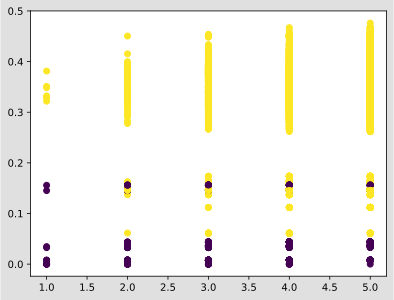

In [271]:
import matplotlib.pyplot as plt

plt.scatter(unzip_hyp[2], unzip_hyp[1], c = unzip_hyp[0])

In [272]:
irr_ratio

[0.6666666666666666,
 0.37254901960784315,
 0.18137254901960784,
 0.07745098039215687,
 0.028711484593837534]

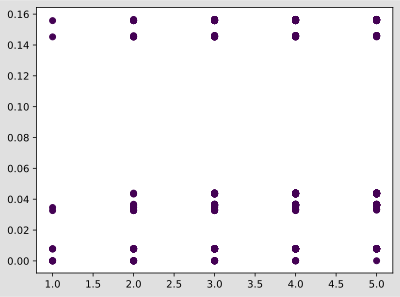

In [273]:
plt.scatter(only_irr_unzip[2], only_irr_unzip[1], c = only_irr_unzip[0])

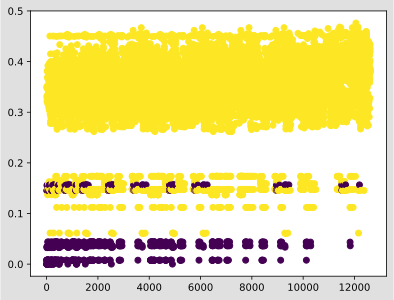

In [274]:
plt.scatter(list(range(0,len(unzip_hyp[1]))),unzip_hyp[1], c = unzip_hyp[0])

In [275]:
ks_res = stats.kstest(unzip_hyp[0],unzip_hyp[1])
ks_res[1]

0.0

In [147]:
def hill_climbing(bn, ev_vars, hyp_vars, depth = np.inf) :
    # Check which are the supplementary variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)
            
    # Delete the ones conditionally independent
    bn_pr = bn
    tmp = supp_vars
    supp_vars = []
    dsep_by_ev = []
    
    for i in tmp :
        if bn_pr.isIndependent(i,hyp_vars,list(ev_vars.keys())) :
            dsep_by_ev.append(i)
        else :
            supp_vars.append(i)
    
    if len(supp_vars) == 0 :
        return dsep_by_ev
    
    irrelevant_singletons = []
    
    posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
    y = posterior.argmax()[0][0]
    
    min_jsd = np.inf
    most_irrel = None
    for i in supp_vars :
        #print(ev_vars, hyp_vars, [i])
        irrel, jsd = map_independence(bn_pr, set_R = [i], ev_vars = ev_vars, hyp_vars = hyp_vars, hyp_posterior=posterior, return_jsd=True)
        if irrel :
            irrelevant_singletons.append(i)
            if jsd < min_jsd :
                min_jsd = jsd
                most_irrel = i
    if most_irrel is None :
        return dsep_by_ev
    current_irrelevant_set = None
    current_depth = None
    if len(dsep_by_ev) > 0 :
        current_irrelevant_set = dsep_by_ev
    else :
        current_irrelevant_set = [most_irrel]
        irrelevant_singletons.remove(most_irrel)
    current_depth = 1
    
    while current_depth < depth and len(irrelevant_singletons)>0 :
        min_jsd = np.inf
        most_irrel = None
        new_irrelevant_singletons = irrelevant_singletons
        for i in irrelevant_singletons :
            current_copy = current_irrelevant_set.copy()
            current_copy.append(i)
            #print(current_copy)
            irrel, jsd = map_independence(bn_pr, set_R = current_copy, ev_vars = ev_vars, hyp_vars = hyp_vars, hyp_posterior=posterior, return_jsd=True)
            if irrel :
                if jsd < min_jsd :
                    min_jsd = jsd
                    most_irrel = i
            else :
                new_irrelevant_singletons.remove(i)
                
        if most_irrel is None :
            return current_irrelevant_set
        current_irrelevant_set.append(most_irrel)
        new_irrelevant_singletons.remove(most_irrel)

        
        dsep_nodes = []
        added = False
        for i in new_irrelevant_singletons :
            if bn.isIndependent(i,hyp_vars,list(ev_vars.keys())+current_irrelevant_set):
                dsep_nodes.append(i)
                added = True
        new_irrelevant_singletons = list_diff(new_irrelevant_singletons, dsep_nodes)
        current_irrelevant_set = current_irrelevant_set + dsep_nodes
        while added == True :
            dsep_nodes = []
            added = False
            for i in new_irrelevant_singletons :
                if bn.isIndependent(i,hyp_vars,list(ev_vars.keys())+current_irrelevant_set):
                    dsep_nodes.append(i)
                    added = True
            new_irrelevant_singletons = list_diff(new_irrelevant_singletons, dsep_nodes)
            current_irrelevant_set = current_irrelevant_set + dsep_nodes
            
        irrelevant_singletons = new_irrelevant_singletons
        current_depth = current_depth+1
            
    return current_irrelevant_set



def hill_climbing2(bn, ev_vars, hyp_vars, depth = np.inf) :
    # Check which are the supplementary variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)
        
    bn_pr = bn
    tmp = supp_vars
    supp_vars = []
    dsep_by_ev = []
    
    for i in tmp :
        if bn_pr.isIndependent(i,hyp_vars,list(ev_vars.keys())) :
            dsep_by_ev.append(i)
        else :
            supp_vars.append(i)
    
    if len(supp_vars) == 0 :
        return dsep_by_ev
    
    irrelevant_singletons = dict()
    
    posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
    y = posterior.argmax()[0][0]
    
    # For singletons
    for i in supp_vars :
        #print(ev_vars, hyp_vars, [i])
        irrel, jsd = map_independence(bn_pr, set_R = [i], ev_vars = ev_vars, hyp_vars = hyp_vars, hyp_posterior=posterior, return_jsd=True)
        if irrel :
            irrelevant_singletons[i] = jsd
    if len(irrelevant_singletons.keys()) == 0 :
        return dsep_by_ev
    
    irrelevant_singletons = {k: v for k, v in sorted(irrelevant_singletons.items(), key=lambda item: item[1])}
    current_irrelevant_set = None
    if len(dsep_by_ev) > 0 :
        current_irrelevant_set = dsep_by_ev
    else :
        current_irrelevant_set = [next(iter(irrelevant_singletons))]
        del irrelevant_singletons[next(iter(irrelevant_singletons))]
    #print(irrelevant_singletons)

    current_depth = 1
    
    # For higher order sets
    while current_depth < depth and len(irrelevant_singletons)>0 :
        new_irrelevant_singletons = irrelevant_singletons.copy()
        for i in irrelevant_singletons.keys() :
            current_copy = current_irrelevant_set.copy()
            current_copy.append(i)
            new_irrelevant_singletons.pop(i)
            irrel = map_independence(bn_pr, set_R = current_copy, ev_vars = ev_vars, hyp_vars = hyp_vars, hyp_posterior=posterior)
            if irrel :
                current_irrelevant_set = current_copy
                
                #prune
                dsep_nodes = []
                added = False
                for i in new_irrelevant_singletons.keys() :
                    if bn.isIndependent(i,hyp_vars,list(ev_vars.keys())+current_copy):
                        dsep_nodes.append(i)
                        added = True
                for k in dsep_nodes :
                    new_irrelevant_singletons.pop(k)
                current_irrelevant_set = current_irrelevant_set + dsep_nodes
                while added == True :
                    dsep_nodes = []
                    added = False
                    for i in new_irrelevant_singletons.keys() :
                        if bn.isIndependent(i,hyp_vars,list(ev_vars.keys())+current_copy):
                            dsep_nodes.append(i)
                            added = True
                    for k in dsep_nodes :
                        new_irrelevant_singletons.pop(k)
                    current_irrelevant_set = current_irrelevant_set + dsep_nodes
                    
                break
        
        irrelevant_singletons = new_irrelevant_singletons
        current_depth = current_depth+1
            
    return current_irrelevant_set


def hill_climbing_mb(bn, ev_vars, hyp_vars, depth = np.inf) :
    # Check which are the supplementary variables
    variables = bn.names()
    supp_vars = []
    for var in variables :
        if var not in list(ev_vars.keys()) and var not in hyp_vars :
            supp_vars.append(var)
            
    # Delete the ones conditionally independent
    bn_pr = bn
    tmp = supp_vars
    supp_vars = []
    dsep_by_ev = []
    
    for i in tmp :
        if bn_pr.isIndependent(i,hyp_vars,list(ev_vars.keys())) :
            dsep_by_ev.append(i)
        else :
            supp_vars.append(i)
    
    if len(supp_vars) == 0 :
        return dsep_by_ev
    
    # Put first the vars in the Markov Blanket
    mb = set()
    for i in hyp_vars :
        mb = mb.union(gum.MarkovBlanket(bn_pr, i).nodes())
    mb_names = []
    for i in mb :
        mb_names.append(bn_pr.variable(i).name())
    tmp = supp_vars
    supp_vars = []
    for i in tmp :
        if i in mb_names :
            supp_vars.append(i)
    tmp = list_diff(tmp, supp_vars)
    supp_vars = supp_vars + tmp
    
    posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
    y = posterior.argmax()[0][0]
    
    irrelevant_singletons = []
    for i in supp_vars :
        irrel = map_independence(bn_pr, set_R = [i], ev_vars = ev_vars, hyp_vars = hyp_vars, hyp_posterior=posterior)
        if irrel :
            irrelevant_singletons.append(i)
    if len(irrelevant_singletons) == 0 :
        return dsep_by_ev
    
    current_irrelevant_set = []
    if len(dsep_by_ev) > 0 :
        current_irrelevant_set = dsep_by_ev
    current_depth = 1
    
    
    new_irrelevant_singletons = irrelevant_singletons
    while current_depth < depth and len(irrelevant_singletons)>0 :
        irrelevant_singletons = new_irrelevant_singletons
        for i in irrelevant_singletons :
            current_copy = current_irrelevant_set.copy()
            current_copy.append(i)
            #print(current_copy)
            irrel = map_independence(bn_pr, set_R = current_copy, ev_vars = ev_vars, hyp_vars = hyp_vars, hyp_posterior=posterior, return_jsd=True)
            new_irrelevant_singletons.remove(i)
            if irrel :
                current_irrelevant_set.append(i)                
                dsep_nodes = []
                added = False
                for i in new_irrelevant_singletons :
                    if bn.isIndependent(i,hyp_vars,list(ev_vars.keys())+current_irrelevant_set):
                        dsep_nodes.append(i)
                        added = True
                new_irrelevant_singletons = list_diff(new_irrelevant_singletons, dsep_nodes)
                current_irrelevant_set = current_irrelevant_set + dsep_nodes
                while added == True :
                    dsep_nodes = []
                    added = False
                    for i in new_irrelevant_singletons :
                        if bn.isIndependent(i,hyp_vars,list(ev_vars.keys())+current_irrelevant_set):
                            dsep_nodes.append(i)
                            added = True
                    new_irrelevant_singletons = list_diff(new_irrelevant_singletons, dsep_nodes)
                    current_irrelevant_set = current_irrelevant_set + dsep_nodes

                current_depth = current_depth+1
                
                break

        

            
    return current_irrelevant_set

In [ ]:
t_silja = []
t_hill = []
for i in range(5,10) :
    prueba = X_test.head(1).to_numpy()
    prueba[0][0:i] = np.nan
    t0 = time.time()
    relevant_sets_sj, irrelevant_sets_sj, dsep_nodes_sj = check_every_r_silja(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])
    tf = time.time()
    t_silja.append(tf-t0)
    print("Silja: ",tf-t0)
    t0 = time.time()
    irrelevant_set = hill_climbing(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])
    tf = time.time()
    t_hill.append(tf-t0)
    print("Prune: ",tf-t0)

In [ ]:
print("Silja: ",t_silja)
print("HC: ",t_hill)

# Silja:  [1.003286361694336, 1.0159821510314941, 3.785571336746216, 18.10024881362915, 70.74511289596558]
# HC:  [0.0025153160095214844, 0.0025963783264160156, 1.2413532733917236, 4.360394716262817, 13.077410459518433]

In [ ]:
plt.plot(t_silja, t_hill, '-o')
plt.show()

In [ ]:
print(irrelevant_sets_sj)
print(irrelevant_set)

In [ ]:
# TODO FSS
# With RB, we can reduce further the dataset
# Method prune network. We can remove the dsep nodes from the reduced dataset
# La cantidad de sampling necesario a veces es absurda y PyAgrum da muy pocas facilidades
prueba = X_test.head(1).to_numpy()
prueba[0][0:15] = np.nan
gum.generateSample(bn, 100000, "file.csv", True)
samples = pd.read_csv("file.csv")
samples = samples[app.columns]
print(samples.dtypes)
new_X = pd.concat([X_train, samples[[i for i in samples.columns if i not in ["Accident"]]]]).reset_index(drop=True)
new_y = pd.concat([y_train,samples["Accident"]]).reset_index(drop=True)
X_red, y_red = reduce_dataset(prueba[0], new_X, new_y)

In [ ]:
# Until now, we used filter approaches, which are fine. However, wrapper approaches were proven to 
# perform better at a higher cost. With the BNs, we aim to reduce that cost.
new_X

In [ ]:
casted = X_train.convert_dtypes()
samples.dtypes
#samples[[i for i in samples.columns if i not in ["Accident"]]]

In [ ]:
X_red

In [ ]:
y_red

In [ ]:
prueba = X_test.head(1).to_numpy()
prueba[0][10:26] = np.nan
evs = prepare_mapi(prueba, X_train.columns)[0]
for i in evs.keys() :
    evs[i] = [str(evs[i])]

In [ ]:
# bn_obs,_ = gum.mutilateBN(gum.BayesNet(bn), observation=evs)
# Somehow this throws an error. I'm sure is an agrum problem

In [ ]:
#sel = feature_selection.GenericUnivariateSelect()
oe = preprocessing.OrdinalEncoder()
sel = feature_selection.RFECV(svm.SVC(kernel="linear"))
sel.fit_transform(oe.fit_transform(X_red),y_red)
sel.support_

In [ ]:
print(X_red.columns[sel.support_ == False])

In [ ]:
feature_selection.mutual_info_classif(oe.fit_transform(X_red),y_red)

In [ ]:
sel = feature_selection.GenericUnivariateSelect()#feature_selection.chi2)
X_new = sel.fit_transform(oe.fit_transform(X_red),y_red)
print(sel.get_support())
print(X_red.columns[sel.get_support() == False])

In [ ]:
t0 = time.time()
irrelevant_set = hill_climbing(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])
tf = time.time()
hill_time = tf-t0
print("Hill_climbing: ",hill_time)

In [ ]:
t_hill = []
t_hill2 = []
for i in range(9,10) :
    prueba = X_test.head(1).to_numpy()
    prueba[0][0:i] = np.nan
    t0 = time.time()
    irrelevant_set = hill_climbing(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])
    tf = time.time()
    t_hill.append(tf-t0)
    print("Silja: ",tf-t0)
    t0 = time.time()
    irrelevant_set2 = hill_climbing2(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])
    tf = time.time()
    t_hill2.append(tf-t0)
    print("Prune: ",tf-t0)

In [ ]:
print(irrelevant_set)
print(irrelevant_set2)
# ['GoodStudent', 'Age', 'VehicleYear', 'SocioEcon', 'MakeModel', 'RuggedAuto', 'RiskAversion', 'DrivQuality']

In [ ]:
print("Greedy: ",t_hill)
print("Super greedy: ",t_hill2)

In [ ]:
plt.plot(t_hill, t_hill2, '-o')
plt.show()

In [ ]:
hill_climbing2(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])

In [ ]:
import pygad

In [ ]:
hyp_vars = ["Accident"]
prueba = X_test.head(1).to_numpy()
prueba[0][0:15] = np.nan
ev_vars = prepare_mapi(prueba, X_train.columns)[0]
supp_vars = [i for i in bn.names() if i not in ev_vars.keys() and i not in hyp_vars]
posterior = map_query(bn, ev_vars = ev_vars, hyp_vars = hyp_vars)
y = posterior.argmax()[0][0]



def fitness_func(solution, solution_idx):
    set_R = []
    for i,rel in enumerate(solution) :
        if rel == 0 :
            set_R.append(supp_vars[i])
    irr, jsd = irrel, jsd = map_independence(bn, set_R = set_R, ev_vars = ev_vars, hyp_vars = hyp_vars, hyp_posterior = posterior, return_jsd=True)
    if not irr :
        return -np.inf
    else :
        return len(set_R)+1-jsd

In [ ]:
fitness_function = fitness_func

num_generations = 5
num_parents_mating = 3

sol_per_pop = 10
num_genes = len(supp_vars)

init_range_low = 0
init_range_high = 1.1

parent_selection_type = "sss"
keep_parents = 3

crossover_type = "single_point"

mutation_type = "random"
mutation_percent_genes = 10

#Create initial population
rels,_,_ = check_every_r_silja(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"], depth = 1)
rels = [i[0] for i in rels]
rel_index = [supp_vars.index(i) for i in rels]
initial_pop =[]
for i in range(0,sol_per_pop) :
    sol = [0]*len(supp_vars)
    for j in range(0,len(supp_vars)) :
        if j in rel_index :
            sol[j] = 1
        else :
            sol[j] = round(random.uniform(0,1))
    initial_pop.append(sol)

In [ ]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       initial_population = initial_pop,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                        gene_type = int)

In [ ]:
t0 = time.time()
ga_instance.run()
tf = time.time()
gen_time = tf-t0


In [ ]:
t0 = time.time()
irrl = hill_climbing2(bn, prepare_mapi(prueba, X_train.columns)[0] , ["Accident"])
tf = time.time()
hill_time = tf-t0

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()

In [ ]:
print("Genetic")
print(solution)
print([i for i in supp_vars if solution[supp_vars.index(i)] == 0])
print(gen_time)
print()
print("Hill climbing")
print(irrl)
print(hill_time)

In [ ]:
solution_fitness

In [ ]:
supp_vars.index("Age")

In [ ]:
supp_vars

In [ ]:
bn_mun = gum.loadBN("andes.bif")

gen_mun = gum.BNDatabaseGenerator(bn_mun)

gen_mun.drawSamples(20)

data_mun = gen_mun.to_pandas()

In [ ]:
h_range = [1,5,10]
supp_range = [50,100,150,200]
print_cols = ["$|\set{S}| = " + str(s) + " $" for s in supp_range]
out = pd.DataFrame(columns=["Alg"] + ["$|\set{S}| = " + str(s) + " $" for s in supp_range])
for k in h_range :
    t_orig_line = ["BF"]
    t_silja_line = ["SA"]
    for j in supp_range :
        t_orig = []
        t_silja = []
        for i in range(0,10) :
            X_mun = data_mun.sample(frac=1, axis=1)
            target = X_mun.columns[0:k]
            X_mun = X_mun[X_mun.columns.drop(target)]
            prueba = X_mun.to_numpy()
            prueba[i][0:j] = np.nan
            t0 = time.time()
            relevant_sets, irrelevant_sets = check_every_r_bn(bn_mun, prepare_mapi(prueba, X_mun.columns)[i] , target, depth = 1)
            tf = time.time()
            t_orig.append(tf-t0)
            #print(relevant_sets, "\n",irrelevant_sets)
            t0 = time.time()
            relevant_sets_sj, irrelevant_sets_sj = check_every_r_silja(bn_mun, prepare_mapi(prueba, X_mun.columns)[i] , target, depth = 1)
            tf = time.time()
            t_silja.append(tf-t0)
            #print(relevant_sets_sj, "\n",irrelevant_sets_sj)
        t_orig = str(round(np.mean(t_orig),2)) + " \pm " + str(round(np.std(t_orig),2))
        t_silja = str(round(np.mean(t_silja),2)) + " \pm " +str(round(np.std(t_silja),2))
        t_orig_line.append(t_orig)
        t_silja_line.append(t_silja)
    out = out.append(pd.Series(t_orig_line, index=out.columns, name="$|\set{H}| = " + str(k) + " $"))
    out = out.append(pd.Series(t_silja_line, index=out.columns, name="$|\set{H}| = " + str(k) + " $"))
        
    

In [ ]:
exp_singleton = out
print(out.to_latex(escape=False))

In [76]:
bn = gum.loadBN("insurance.bif")
gen = gum.BNDatabaseGenerator(bn)
gen.drawSamples(20)
data = gen.to_pandas()
target = ["Accident"]
X_og = data[data.columns.drop(target)]

In [ ]:
supp_range = [10]
print_cols = ["$|\set{S}| = " + str(s) + " $" for s in supp_range]
out = pd.DataFrame(columns=["$|\set{S}| = " + str(s) + " $" for s in supp_range])
t_orig_line = []
t_silja_line = []
for j in supp_range :
    t_orig = []
    t_silja = []
    for i in range(0,10) :
        X = X_og.sample(frac=1, axis=1)
        prueba = X.to_numpy()
        prueba[i][0:j] = np.nan
        t0 = time.time()
        relevant_sets, irrelevant_sets = check_every_r_bn(bn, prepare_mapi(prueba, X.columns)[i] , target)
        tf = time.time()
        t_orig.append(tf-t0)
        #print(relevant_sets, "\n",irrelevant_sets)
        t0 = time.time()
        relevant_sets_sj, irrelevant_sets_sj = check_every_r_silja(bn, prepare_mapi(prueba, X.columns)[i], target)
        tf = time.time()
        t_silja.append(tf-t0)
    t_orig = str(round(np.mean(t_orig),2)) + " \pm " + str(round(np.std(t_orig),2))
    t_silja = str(round(np.mean(t_silja),2)) + " \pm " +str(round(np.std(t_silja),2))
                            
    t_orig_line.append(t_orig)
    t_silja_line.append(t_silja)
                            
out = out.append(pd.Series(t_orig_line, index=out.columns, name="Brute force"))
out = out.append(pd.Series(t_silja_line, index=out.columns, name="Exhaustive (prunes)"))

In [ ]:
exp_exhaustive = out
print(out.to_latex(escape=False))

In [148]:
supp_range = [2,6,10,14]
out = pd.DataFrame(columns=["$|\set{S}| = " + str(s) + " $" for s in supp_range])
df_means = pd.DataFrame()
df_vars = pd.DataFrame()
t_silja_line = []
t_hill_line = []
diff_line = []
t_hill_line2 = []
diff_line2 = []
for j in supp_range :
    print("Init iteration with R = ",j)
    t_silja = []
    t_hill = []
    diff = []
    t_hill2 = []
    diff2 = []
    for i in range(0,5) :
        X = X_og.sample(frac=1, axis=1)
        prueba = X.to_numpy()
        prueba[i][0:j] = np.nan
        print("\t Exhaustive: ",end = '')
        t0 = time.time()
        relevant_sets_sj, irrelevant_sets_sj = check_every_r_mixed(bn, prepare_mapi(prueba, X.columns)[i], target)
        tf = time.time()
        t_silja.append(tf-t0)
        print(tf-t0)
    
        print("\t HC: ",end = '')
        t0 = time.time()
        irrelevant_set = hill_climbing2(bn, prepare_mapi(prueba, X.columns)[i] , target)
        tf = time.time()
        t_hill.append(tf-t0)
        print(tf-t0)
        print(irrelevant_sets_sj)
        print(irrelevant_set)
        print()
        if len(irrelevant_sets_sj) == 0 or len(irrelevant_sets_sj[-1]) < len(irrelevant_set) :
            diff.append(0)
        elif len(irrelevant_set) == 0 :
            diff.append(len(irrelevant_sets_sj[-1]) * 100)
        else :
            diff.append((len(irrelevant_sets_sj[-1]) / len(irrelevant_set) - 1) * 100)
        
        print("\t HC greedy: ",end = '')
        t0 = time.time()
        irrelevant_set = hill_climbing_mb(bn, prepare_mapi(prueba, X.columns)[i] , target)
        tf = time.time()
        print(tf-t0)
        t_hill2.append(tf-t0)
        print(irrelevant_sets_sj)
        print(irrelevant_set)
        print()
        if len(irrelevant_sets_sj) == 0 or len(irrelevant_sets_sj[-1]) < len(irrelevant_set) :
            diff2.append(0)
        elif len(irrelevant_set) == 0 :
            diff2.append(len(irrelevant_sets_sj[-1]) * 100)
        else :
            diff2.append((len(irrelevant_sets_sj[-1]) / len(irrelevant_set) - 1) * 100)


    print("End iteration with R = ",j)
    #print(relevant_sets_sj, "\n",irrelevant_sets_sj)
    df_means[str(j)] = [round(np.mean(t_silja),2),round(np.mean(t_hill),2),round(np.mean(diff),2),
                        round(np.mean(t_hill2),2),round(np.mean(diff2),2)]
    df_vars[str(j)] = [round(np.std(t_silja),2),round(np.std(t_hill),2),round(np.std(diff),2),
                        round(np.std(t_hill2),2),round(np.std(diff2),2)]
        
    t_silja = str(round(np.mean(t_silja),2)) + " \pm " +str(round(np.std(t_silja),2))
    t_hill = str(round(np.mean(t_hill),2)) + " \pm " + str(round(np.std(t_hill),2))
    diff = str(round(np.mean(diff),2)) + " \pm " +str(round(np.std(diff),2))+ " \%"
    t_hill2 = str(round(np.mean(t_hill2),2)) + " \pm " + str(round(np.std(t_hill2),2))
    diff2 = str(round(np.mean(diff2),2)) + " \pm " +str(round(np.std(diff2),2))+ " \%"
                            
    t_silja_line.append(t_silja)
    t_hill_line.append(t_hill)
    diff_line.append(diff)
    t_hill_line2.append(t_hill2)
    diff_line2.append(diff2)
    
    print("Saved iteration with R = ",j)
    print()
                            
out = out.append(pd.Series(t_silja_line, index=out.columns, name="Exhaustive (prunes)"))
out = out.append(pd.Series(t_hill_line, index=out.columns, name="Hill climbing greedy"))
out = out.append(pd.Series(diff_line, index=out.columns, name="Optimal ratio greedy"))
out = out.append(pd.Series(t_hill_line2, index=out.columns, name="Hill climbing MB"))
out = out.append(pd.Series(diff_line2, index=out.columns, name="Optimal ratio MB"))

Init iteration with R =  2
	 Exhaustive: 0.00047278404235839844
	 HC: 0.00037741661071777344
['CarValue', 'ThisCarCost']
['CarValue', 'ThisCarCost']

	 HC greedy: 0.00039768218994140625
['CarValue', 'ThisCarCost']
['CarValue', 'ThisCarCost']

	 Exhaustive: 0.004559516906738281
	 HC: 0.010675191879272461
[('VehicleYear', 'ILiCost')]
['VehicleYear', 'ILiCost']

	 HC greedy: 0.011259317398071289
[('VehicleYear', 'ILiCost')]
['VehicleYear', 'ILiCost']

	 Exhaustive: 0.003513336181640625
	 HC: 0.0029234886169433594
[('Airbag',)]
['Airbag']

	 HC greedy: 0.002407550811767578
[('Airbag',)]
['Airbag']

	 Exhaustive: 0.0004291534423828125
	 HC: 0.00037932395935058594
['CarValue', 'DrivingSkill']
['CarValue', 'DrivingSkill']

	 HC greedy: 0.0004432201385498047
['CarValue', 'DrivingSkill']
['CarValue', 'DrivingSkill']

	 Exhaustive: 0.00464177131652832
	 HC: 0.013745546340942383
[('DrivingSkill', 'Mileage')]
['DrivingSkill', 'Mileage']

	 HC greedy: 0.013416767120361328
[('DrivingSkill', 'Mileage

KeyboardInterrupt: 

In [144]:
np.savetxt("heur-mean.txt",df_means)
np.savetxt("heur-std.txt",df_vars)

exp_heuristic = out
print(out.to_latex(escape=False))

\begin{tabular}{llll}
\toprule
{} & $|\set{S}| = 2 $ & $|\set{S}| = 6 $ & $|\set{S}| = 10 $ \\
\midrule
Exhaustive (prunes)  &      0.0 \pm 0.0 &    0.92 \pm 1.82 &  73.38 \pm 111.44 \\
Hill climbing        &    0.01 \pm 0.01 &    0.47 \pm 0.77 &     5.99 \pm 6.86 \\
Optimal ratio        &   0.0 \pm 0.0 \% &   0.0 \pm 0.0 \% &    0.0 \pm 0.0 \% \\
Hill climbing greedy &    0.01 \pm 0.01 &    0.75 \pm 0.88 &      7.0 \pm 5.35 \\
Optimal ratio greedy &   0.0 \pm 0.0 \% &   0.0 \pm 0.0 \% &   5.0 \pm 10.0 \% \\
\bottomrule
\end{tabular}



/tmp/ipykernel_56956/502855826.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(out.to_latex(escape=False))


In [ ]:
map_independence(bn, ['PropCost', 'GoodStudent', 'SeniorTrain', 'HomeBase', 'Airbag', 'VehicleYear', 'MakeModel'], prepare_mapi(prueba, X.columns)[i] , target)

In [ ]:
np.savetxt('singleton.txt', exp_singleton)

In [ ]:
np.savetxt('exh.txt', exp_exhaustive)

In [ ]:
df_means

In [149]:
med_data = pd.read_csv("hepatitis.csv")

print(med_data.dtypes)

# Impute continuous values
num_columns = ["age","bilirubin","alk_phosphate","sgot","albumin","protime"]
int_columns = ["age","alk_phosphate","sgot","protime"]
med_data_cont = med_data[num_columns]
imp = impute.IterativeImputer(missing_values=np.nan, initial_strategy = "mean")
med_data_cont = imp.fit_transform(med_data_cont)

# Add imputed contonuous values to dataset
med_data.drop(num_columns, axis = 1)
for i,name in enumerate(num_columns) :
    med_data[name] = med_data_cont.transpose()[i]

# Impute discrete values
imp = impute.SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
tmp = imp.fit_transform(med_data)
med_data = pd.DataFrame(tmp, columns=med_data.columns)

#Change types of imputed data
for i in  list_diff(num_columns,int_columns):
    med_data = med_data.astype({i: 'float64'})
for i in int_columns :
    med_data = med_data.astype({i: 'int64'})
        
# Binning. In quartiles, except for age and protime, which will be divide in uniform bins of length 10
for i in num_columns[1:5] :
    med_data[i], cut_bin = pd.qcut(med_data[i], q = 3, retbins = True)
med_data["age"], cut_bin = pd.cut(med_data["age"], bins = list(range(0,90,20)), retbins = True)
med_data["protime"], cut_bin = pd.cut(med_data["protime"], bins = list(range(0,110,25)), retbins = True, include_lowest = True)

# Convert from interval to object
for i in  num_columns:
    med_data = med_data.astype({i: 'str'})

med_data

age                  int64
sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object


age     sex steroid antivirals fatigue malaise anorexia liver_big  \
0    (20, 40]    male   False      False   False   False    False     False   
1    (40, 60]  female   False      False    True   False    False     False   
2    (60, 80]  female    True      False    True   False    False      True   
3    (20, 40]  female    True       True   False   False    False      True   
4    (20, 40]  female    True      False   False   False    False      True   
..        ...     ...     ...        ...     ...     ...      ...       ...   
150  (40, 60]  female    True      False    True    True     True      True   
151  (40, 60]  female    True      False    True   False    False      True   
152  (60, 80]  female   False      False    True    True    False     False   
153  (40, 60]    male   False      False    True   False    False      True   
154  (40, 60]  female    True      False    True   False    False      True   

    liver_firm spleen_palpable spiders ascites varices     bilirubin  \
0        False           False   False   False   False    (0.9, 1.3]   
1        False           False   False   False   False  (0.299, 0.9]   
2        False           False   False   False   False  (0.299, 0.9]   
3        False           False   False   False   False  (0.299, 0.9]   
4        False           False   False   False   False    (0.9, 1.3]   
..         ...             ...     ...     ...     ...           ...   
150      False           False    True    True    True    (1.3, 8.0]   
151       True           False   False   False   False  (0.299, 0.9]   
152       True           False    True   False   False  (0.299, 0.9]   
153      False            True    True   False    True    (1.3, 8.0]   
154      False            True    True    True   False    (0.9, 1.3]   

        alk_phosphate              sgot       albumin        protime  \
0      (25.999, 85.0]  (13.999, 43.333]    (3.7, 4.0]   (50.0, 75.0]   
1    (107.667, 295.0]  (13.999, 43.333]  (2.099, 3.7]   (50.0, 75.0]   
2     (85.0, 107.667]  (13.999, 43.333]    (3.7, 4.0]   (50.0, 75.0]   
3      (25.999, 85.0]    (43.333, 80.0]    (3.7, 4.0]  (75.0, 100.0]   
4    (107.667, 295.0]     (80.0, 648.0]    (3.7, 4.0]   (50.0, 75.0]   
..                ...               ...           ...            ...   
150  (107.667, 295.0]     (80.0, 648.0]  (2.099, 3.7]   (25.0, 50.0]   
151  (107.667, 295.0]     (80.0, 648.0]    (4.0, 6.4]   (50.0, 75.0]   
152    (25.999, 85.0]  (13.999, 43.333]    (4.0, 6.4]   (50.0, 75.0]   
153    (25.999, 85.0]  (13.999, 43.333]    (4.0, 6.4]   (25.0, 50.0]   
154   (85.0, 107.667]  (13.999, 43.333]  (2.099, 3.7]   (25.0, 50.0]   

    histology class  
0       False  live  
1       False  live  
2       False  live  
3       False  live  
4       False  live  
..        ...   ...  
150      True   die  
151      True  live  
152      True  live  
153      True  live  
154      True   die  

[155 rows x 20 columns]

In [205]:
#X = data[data.columns.drop(["RiskAversion", "Accident"])]
#y = data[["RiskAversion", "Accident"]]

learner=gum.BNLearner(med_data)

bn_med = learner.learnBN()

bn_med=learner.useGreedyHillClimbing().useScoreK2().learnBN()

In [206]:
gnb.flow.add(gnb.getBN(bn_med,size="20"))
gnb.flow.display()

In [245]:
difficult = ["bilirubin","alk_phosphate","sgot","albumin","protime"]
target = ["class"]

# Patients
patient_1 = prepare_mapi([med_data.iloc[154].to_numpy()], med_data.columns)[0]
for i in difficult + target :
    patient_1.pop(i)
print(patient_1)
patient_2 = prepare_mapi([med_data.iloc[136].to_numpy()], med_data.columns)[0]
for i in difficult + target :
    patient_2.pop(i)
print(patient_2)

patient_3 = patient_2.copy()
for i in ["liver_big", "liver_firm", "spleen_palpable", "steroid"] :
    patient_3.pop(i)
print(patient_3)

print(pd.DataFrame([patient_1,patient_2]).to_latex())

{'age': '(40, 60]', 'sex': 'female', 'steroid': True, 'antivirals': False, 'fatigue': True, 'malaise': False, 'anorexia': False, 'liver_big': True, 'liver_firm': False, 'spleen_palpable': True, 'spiders': True, 'ascites': True, 'varices': False, 'histology': True}
{'age': '(40, 60]', 'sex': 'female', 'steroid': True, 'antivirals': False, 'fatigue': False, 'malaise': False, 'anorexia': False, 'liver_big': False, 'liver_firm': True, 'spleen_palpable': False, 'spiders': True, 'ascites': False, 'varices': False, 'histology': True}
{'age': '(40, 60]', 'sex': 'female', 'antivirals': False, 'fatigue': False, 'malaise': False, 'anorexia': False, 'spiders': True, 'ascites': False, 'varices': False, 'histology': True}
\begin{tabular}{lllllllllllllll}
\toprule
{} &       age &     sex &  steroid &  antivirals &  fatigue &  malaise &  anorexia &  liver\_big &  liver\_firm &  spleen\_palpable &  spiders &  ascites &  varices &  histology \\
\midrule
0 &  (40, 60] &  female &     True &       False 

/tmp/ipykernel_56956/3442653938.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.DataFrame([patient_1,patient_2]).to_latex())


In [256]:
difficult = ["bilirubin","alk_phosphate","sgot","albumin","protime"]

irrelevancies = []
irrelevancies_heur = []

patient1 = {}
for i,patient in enumerate([patient_1,patient_2]) :
    print("Patient: " + str(i+1))
    print(map_query(bn_med, patient , target).argmax())
    relevant_sets, irrelevant_sets = check_every_r_mixed(bn_med, patient , target)
    #irrel = hill_climbing_mb(bn_med, patient , ["class"])
    print(relevant_sets)
    print(irrelevant_sets)
    #print(irrel)
    print()
print(map_independence(bn_med, ['sgot', 'albumin', "alk_phosphate"], patient_3 , target))

Patient: 1
([{'class': 0}], 0.8285531364264878)
[]
[('albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate')]

Patient: 2
([{'class': 1}], 0.7794707804411233)
[('albumin', 'bilirubin'), ('protime', 'bilirubin'), ('bilirubin', 'alk_phosphate')]
[('sgot', 'bilirubin'), ('albumin', 'sgot', 'protime', 'alk_phosphate')]

False


In [254]:
print(map_independence(bn_med, ['sgot', 'albumin', 'alk_phosphate', "protime"], patient_2 , target))

True


In [173]:
print(relevant_sets)
print(irrelevant_sets)
print(irrel)

[]
[('albumin', 'bilirubin', 'sgot', 'protime', 'alk_phosphate')]
['albumin', 'protime', 'alk_phosphate', 'bilirubin', 'sgot']


In [220]:
difficult = ["bilirubin","alk_phosphate","sgot","albumin","protime"]

irrelevancies = []
irrelevancies_heur = []

for n,i in enumerate(med_data.to_numpy()) :
    ev_vars = prepare_mapi([i], med_data.columns)[0]
    ev_vars.pop("class")
    for i in difficult :
        ev_vars.pop(i)
    print(n, ":  ",map_query(bn_med, ev_vars , ["class"]).argmax())

    #irrelevancies.append(check_every_r_silja(bn_med, ev_vars , ["class"]))
    #irrelevancies_heur.append(hill_climbing2(bn_med, ev_vars , ["class"]))

0 :   ([{'class': 1}], 0.9957325580630997)
1 :   ([{'class': 1}], 0.8714565507394476)
2 :   ([{'class': 1}], 0.9341120200216608)
3 :   ([{'class': 1}], 0.9889296233919529)
4 :   ([{'class': 1}], 0.992729310420546)
5 :   ([{'class': 1}], 0.992729310420546)
6 :   ([{'class': 1}], 0.6056750584554476)
7 :   ([{'class': 1}], 0.992729310420546)
8 :   ([{'class': 1}], 0.9550882996090567)
9 :   ([{'class': 1}], 0.992729310420546)
10 :   ([{'class': 1}], 0.9827832611022844)
11 :   ([{'class': 1}], 0.9243777498206537)
12 :   ([{'class': 1}], 0.9535646763181328)
13 :   ([{'class': 1}], 0.9550882996090567)
14 :   ([{'class': 1}], 0.9847895091084353)
15 :   ([{'class': 0}], 0.5471933351470936)
16 :   ([{'class': 1}], 0.9341120200216608)
17 :   ([{'class': 1}], 0.9314998123996145)
18 :   ([{'class': 1}], 0.992729310420546)
19 :   ([{'class': 1}], 0.9827832611022844)
20 :   ([{'class': 1}], 0.9921782570642733)
21 :   ([{'class': 1}], 0.7713757488217368)
22 :   ([{'class': 1}], 0.992729310420546)
23 :

In [203]:
print(irrelevancies)
print(irrelevancies_heur)

[([], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate']), ([], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate']), ([], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate']), ([], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate']), ([], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate']), ([], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate']), ([], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate']), ([], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate']), ([], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate']), ([], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate'])]
[['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate'], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate'], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate'], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate'], ['albumin', 'sgot', 'protime', 'bilirubin', 'alk_phosphate'], ['albumi